In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from toolkit.opto import defineOptoPopulationTTest
from myphdlib.interface.nope import NOPESession
import numpy as np
from toolkit.opto import defineOptoPopulation
from toolkit.process import AnalysisObject
from myphdlib.interface.factory import SessionFactory
import os
import felsen_analysis.toolkit.saccades as fs
import felsen_analysis.toolkit.opto as op
import felsen_analysis.toolkit.populations as pop
import felsen_analysis.toolkit.plots as pl

In [3]:
fileList = [
           '/media/jbhunt/Seagate Portable Drive/2023-07-24/mlati9',
             '/media/jbhunt/Seagate Portable Drive/2023-07-25/mlati10',
             '/media/jbhunt/Seagate Portable Drive/2023-07-26/mlati9',
             '/media/jbhunt/Seagate Portable Drive/2023-07-27/mlati10',
             '/media/jbhunt/Seagate Portable Drive/2023-07-28/mlati9',
             '/media/jbhunt/Seagate Portable Drive/2023-07-31/mlati10',
             '/media/jbhunt/Seagate Portable Drive/2023-08-01/mlati10']

In [77]:
h5file = '/media/jbhunt/EPHYS-01/7-31-25/gaussian/output.hdf'
basePath = '/media/jbhunt/EPHYS-01/2025-07-31_11-45-04'
clusterFile = '/media/jbhunt/EPHYS-01/7-31-25/gaussian/ephys/sorting/manual/spike_clusters.npy'
session2 = NOPESession('/media/jbhunt/EPHYS-01/7-31-25/gaussian')
matrix = session2.load('labjack/matrix')
opto = matrix[:, 14]
optoIndices = np.where(np.diff(opto) == 1)[0]
optoTimes = session2.computeTimestamps(optoIndices)
#clusterList, pList = defineOptoPopulationTTest(h5file, clusterFile, optoTimes)

In [19]:
print(np.max(optoTimes))

23.554


In [78]:
from toolkit.opto import removeArtifacts
removeArtifacts(basePath, 'gaussian', 'linear', optoTimes, ms_before=0.5, ms_after=3.6, scale_amplitude=False, time_jitter=0, offsets=False)

35.912


write_binary_recording:   0%|          | 0/36 [00:00<?, ?it/s]

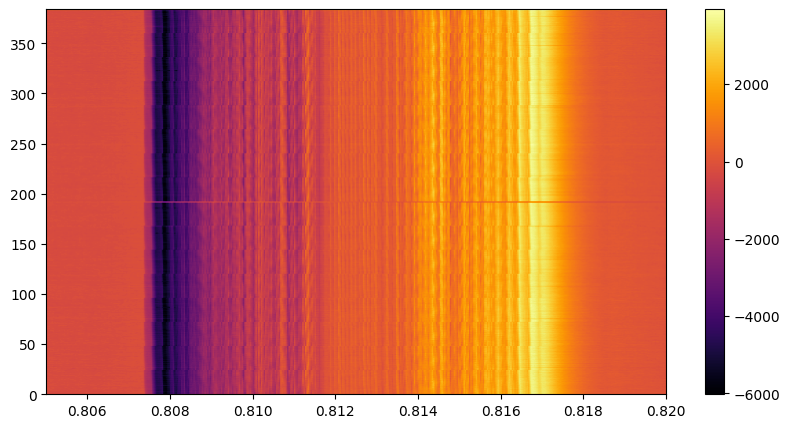

In [83]:
t2plot = [0.805, 0.82]
folderPath = '/media/jbhunt/EPHYS-01/2025-07-31_11-45-04/Record Node 101'
datPath = '/media/jbhunt/EPHYS-01/2025-07-31_11-45-04/gaussianlinearartifact.dat'
fig, ax = op.plotRawNeuropixelsData(t2plot, folderPath, datPath, vmin=None, vmax=None)

In [10]:
clusterList, pList = op.defineOptoPopulationTTest(h5file, clusterFile, optoTimes)
optoUnitsT = list()
for i, p in enumerate(pList):
    if p < 0.01:
        optoUnitsT.append(clusterList[i])
optoUnitsManual = [99, 146, 150, 173, 181, 222, 290, 382]
optoUnitsZeta = defineOptoPopulation(h5file, clusterFile)

FileNotFoundError: [Errno 2] No such file or directory: '/media/jbhunt/EPHYS-01/7-31-25/square/ephys/sorting/manual/spike_clusters.npy'

Text(0, 0.5, 'FR (spikes/sec)')

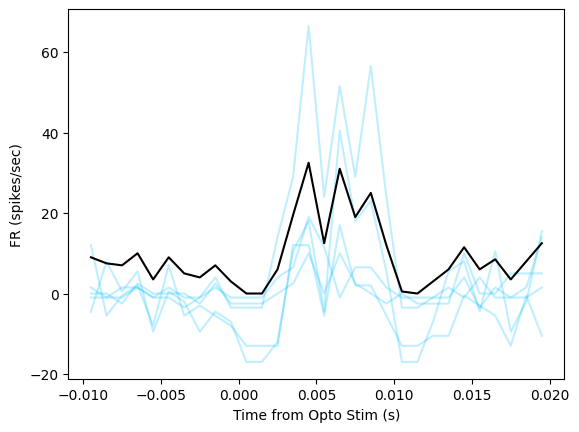

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
frList = list()
session = AnalysisObject(h5file)
population = session._population()
for unit in population:
    if unit.cluster in optoUnitsManual:
        spikeTimes = unit.timestamps
        t, fr = unit.peth(optoTimes, (-0.01, 0.02), 0.001)
        baseline = np.mean(fr[0:5])
        corrected = fr - baseline
        #plt.plot(t, corrected, color='magenta', alpha=0.25)
        #frList.append(fr)
    if unit.cluster in optoUnitsZeta:
        spikeTimes = unit.timestamps
        t, fr = unit.peth(optoTimes, (-0.01, 0.02), 0.001)
        baseline = np.mean(fr[0:5])
        corrected = fr - baseline
        #plt.plot(t, corrected, color='limegreen', alpha=0.25)
       # frList.append(fr)
    if unit.cluster in optoUnitsFinal:
        spikeTimes = unit.timestamps
        t, fr = unit.peth(optoTimes, (-0.01, 0.02), 0.001)
        baseline = np.mean(fr[0:5])
        corrected = fr - baseline
        plt.plot(t, corrected, color='deepskyblue', alpha=0.25)
        frList.append(fr)
frAvg = np.mean(frList, axis=0)
plt.plot(t, frAvg, color='k')
#plt.ylim(-50, 50)
plt.xlabel('Time from Opto Stim (s)')
plt.ylabel('FR (spikes/sec)')

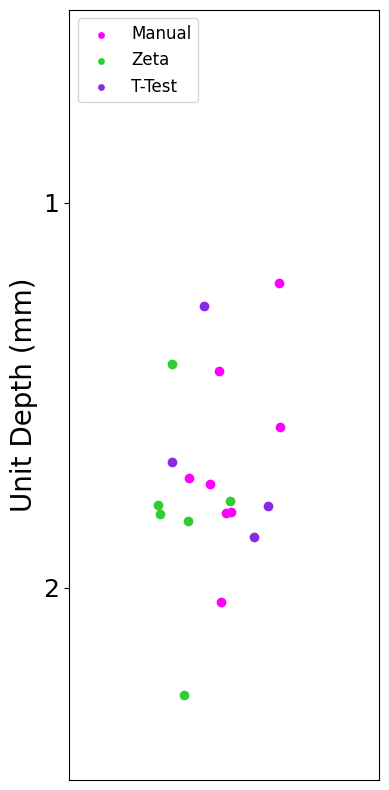

In [12]:
depthDict = pop.getUnitDepth(h5file, optoUnitsManual, optoUnitsZeta, optoUnitsT, depthDict=None)
fig, ax = pl.plotUnitDepth(depthDict, saveFig=False)
ax.scatter(0, 0, s=15, color='magenta', label='Manual')
ax.scatter(0, 0, s=15, color='limegreen', label='Zeta')
ax.scatter(0, 0, s=15, color='blueviolet', label='T-Test')
ax.set_ylim(250, 50)
ax.legend(fontsize=12, loc='upper left')

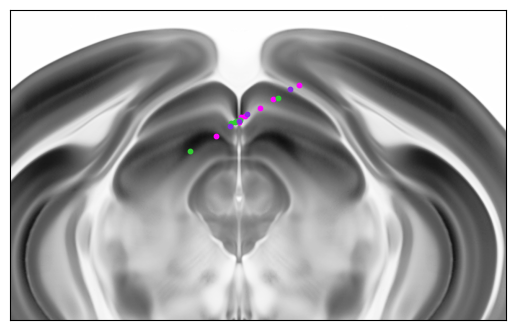

In [22]:
coordDict = pop.getUnitCoords(h5file, optoUnitsManual, optoUnitsZeta, optoUnitsT)
fig, ax = pl.plotUnitDepthOverBrain(coordDict)

In [27]:
optoUnits2 = list()
for unit in optoUnitsManual:
    if unit in optoUnitsZeta:
        optoUnits2.append(unit)
    if unit in optoUnitsT:
        optoUnits2.append(unit)
for unit in optoUnitsZeta:
    if unit in optoUnitsManual:
        optoUnits2.append(unit)
    if unit in optoUnitsT:
        optoUnits2.append(unit)
for unit in optoUnitsT:
    if unit in optoUnitsZeta:
        optoUnits2.append(unit)
    if unit in optoUnitsManual:
        optoUnits2.append(unit)
optoUnitsFinal = np.unique(optoUnits2)
print(optoUnitsFinal)

[ 99 146 173 181 382]


In [87]:
factory = SessionFactory(tag='Suguru')
#sessions = factory.produce(experiment=('NPDreadd'), animals=('dreadd4.2'))
sessions = factory.produce(experiment=('Muscimol'), animals=('dreadd1', 'dreadd2', 'dreadd3', 'dreadd4'))

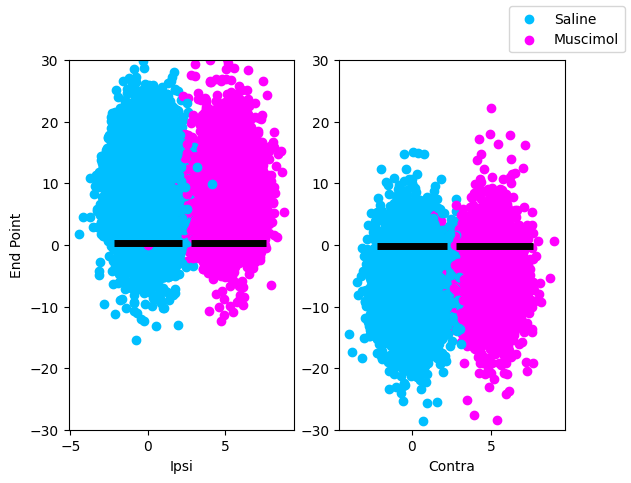

In [110]:
import matplotlib.pyplot as plt
ipsiSal = list()
contraSal = list()
ipsiMus = list()
contraMus = list()
fig, ax = plt.subplots(1,2)
for session in sessions:
    h5file = os.path.join(session.home, 'output.hdf')
    labels = session.load('saccades/predicted/left/labels')
    #saccadesIpsi = len(np.where(labels == 1)[0])
    #saccadesContra = len(np.where(labels == -1)[0])
    saccadesIpsi = fs.calculateSaccadeEndPoint(h5file, session.saccadeTimestamps[labels==1, 0])
    saccadesContra = fs.calculateSaccadeEndPoint(h5file, session.saccadeTimestamps[labels==-1, 0])    
    if session.treatment == 'saline':
        ax[1].scatter(0 + np.random.randn(len(saccadesContra)), saccadesContra, color='deepskyblue', alpha=1)
        ax[0].scatter(0 + np.random.randn(len(saccadesIpsi)), saccadesIpsi, color='deepskyblue', alpha=1)
        ipsiSal.append(saccadesIpsi)
        contraSal.append(saccadesContra)
    elif session.treatment == 'muscimol':
        ax[1].scatter(5 + np.random.randn(len(saccadesContra)), saccadesContra, color='magenta', alpha=1)
        ax[0].scatter(5 + np.random.randn(len(saccadesIpsi)), saccadesIpsi, color='magenta', alpha=1)
        ipsiMus.append(saccadesIpsi)
        contraMus.append(saccadesContra)
avgIS = np.nanmean(ipsiSal).mean()
avgCS = np.nanmean(contraSal).mean()
avgIM = np.nanmean(ipsiMus).mean()
avgCM = np.nanmean(contraMus).mean()
ax[0].scatter(0, 0, color='deepskyblue', label='Saline')
ax[0].scatter(0, 0, color='magenta', label='Muscimol')
ax[0].hlines(avgIS, -2.2, 2.2, color='k', linewidth=5)
ax[0].hlines(avgIM, 2.8, 7.6, color='k', linewidth=5)
ax[1].hlines(avgCS, -2.2, 2.2, color='k', linewidth=5)
ax[1].hlines(avgCM, 2.8, 7.6, color='k', linewidth=5)
ax[0].set_xlabel('Ipsi')
ax[1].set_xlabel('Contra')
ax[0].set_ylabel('End Point')
#ax[0].set_xticks([])
#ax[1].set_xticks([])
ax[0].set_ylim(-30, 30)
ax[1].set_ylim(-30, 30)
fig.legend()

In [107]:
avgIS

0.009088500883557537

/media/jbhunt/Seagate Portable Drive/2023-07-26/mlati9
Event 0 is NaN
Event 4 is NaN
Event 7 is NaN
Event 14 is NaN
Event 23 is NaN
Event 28 is NaN
Event 33 is NaN
Event 68 is NaN
Event 78 is NaN
Event 82 is NaN
Event 84 is NaN
Event 93 is NaN
Event 94 is NaN
Event 97 is NaN
Event 187 is NaN
Event 190 is NaN
Event 191 is NaN
Event 192 is NaN
Event 214 is NaN
Event 238 is NaN
Event 241 is NaN
Event 249 is NaN
Event 267 is NaN
Event 287 is NaN
Event 288 is NaN
Event 307 is NaN
Event 310 is NaN
Event 311 is NaN
Event 313 is NaN
Event 324 is NaN
Event 326 is NaN
Event 338 is NaN
Event 365 is NaN
Event 370 is NaN
Event 386 is NaN
Event 387 is NaN
Event 442 is NaN
Event 443 is NaN
Event 455 is NaN
Event 458 is NaN


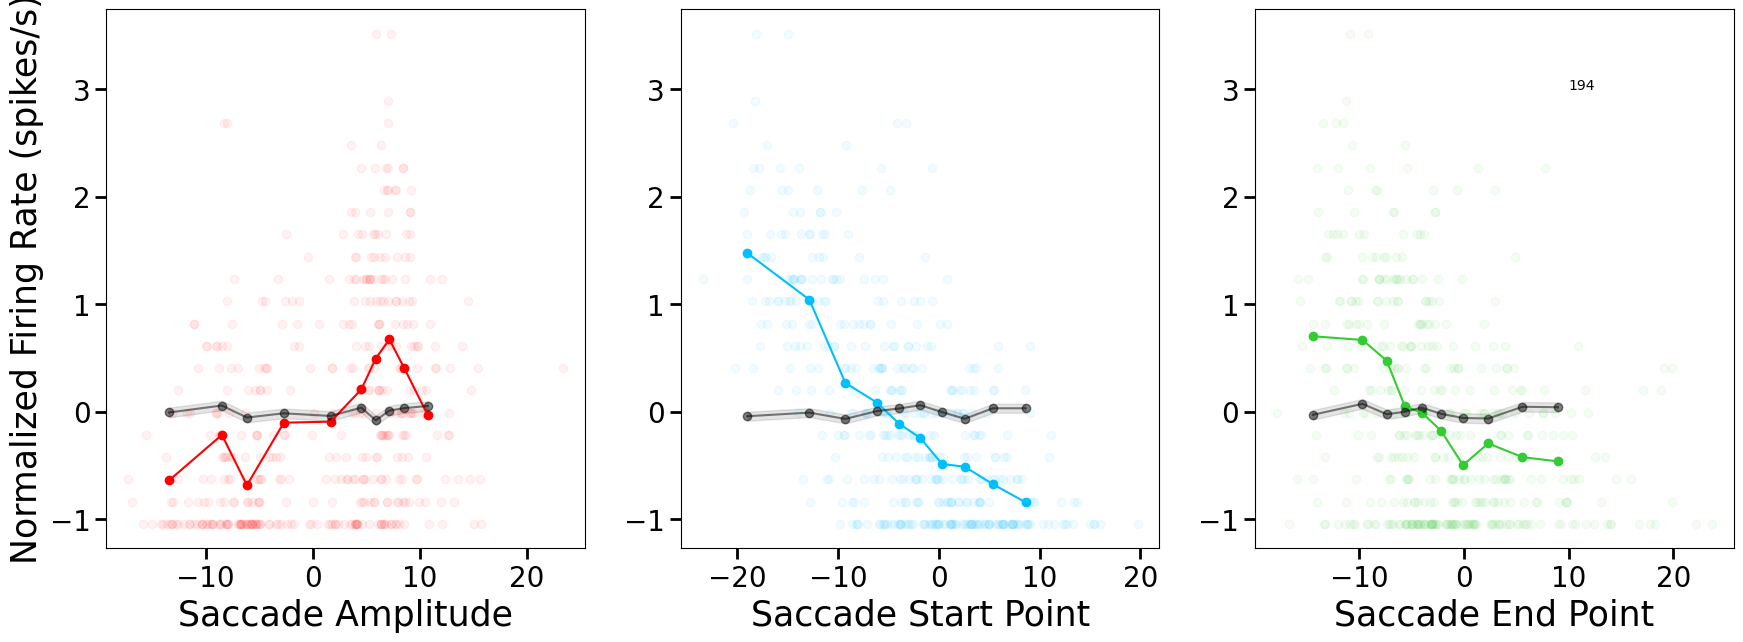

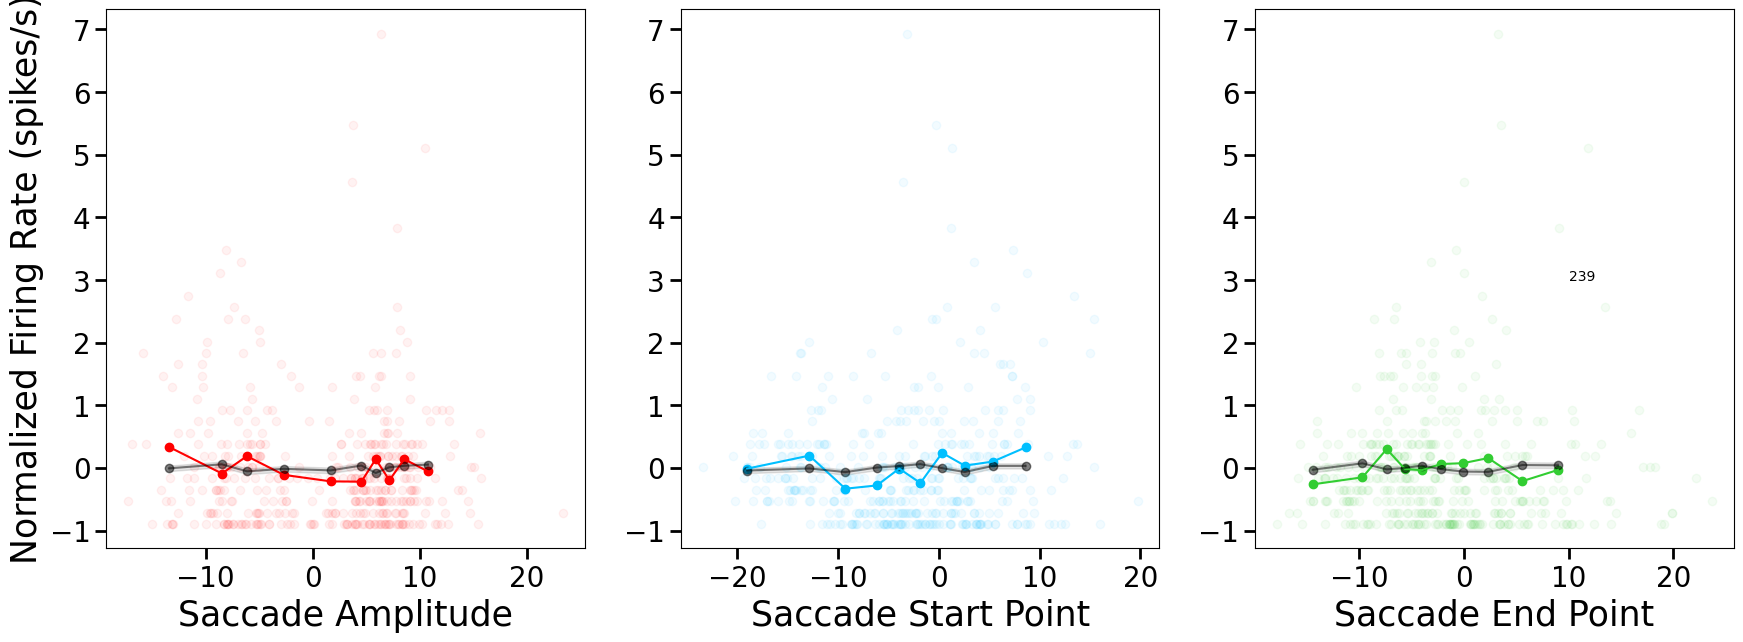

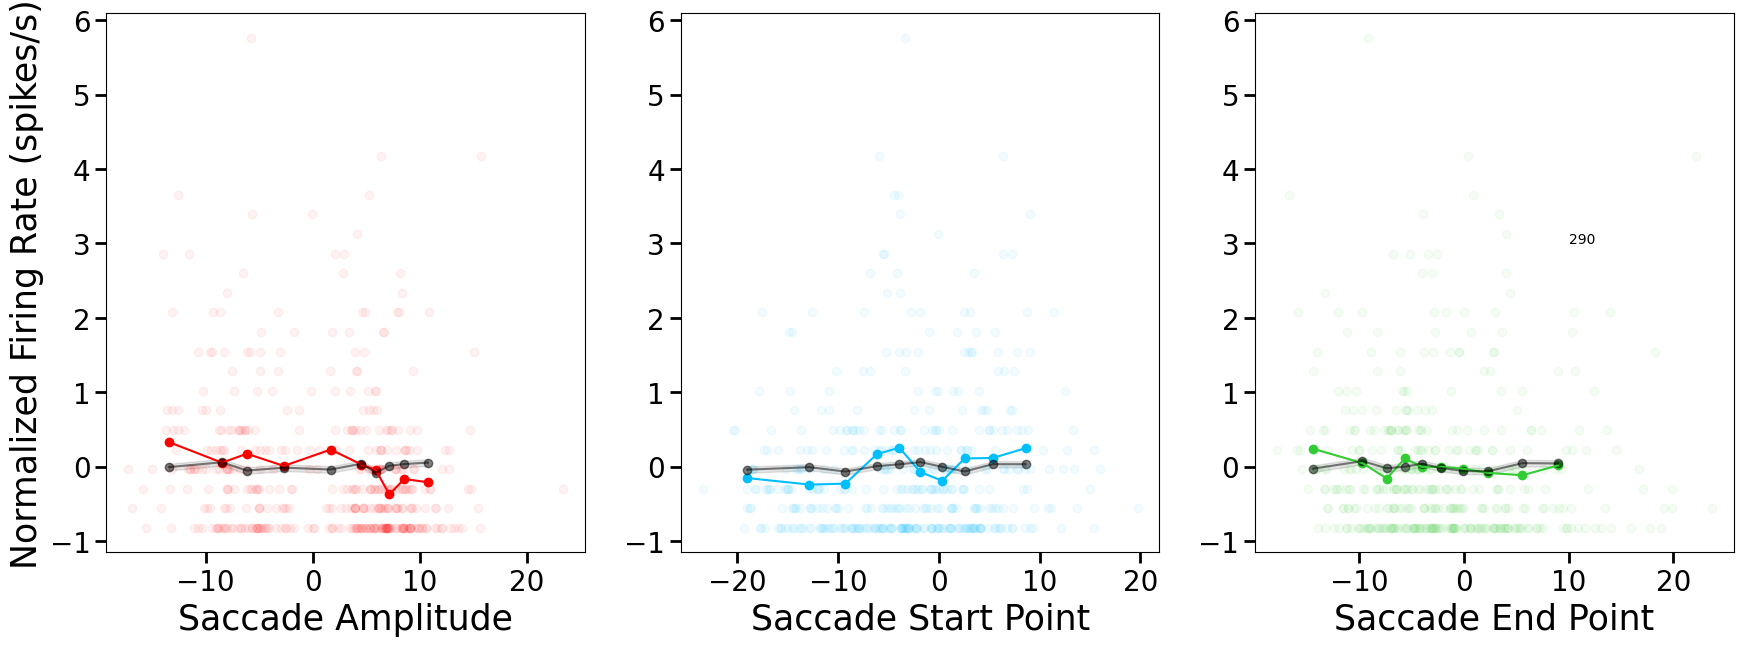

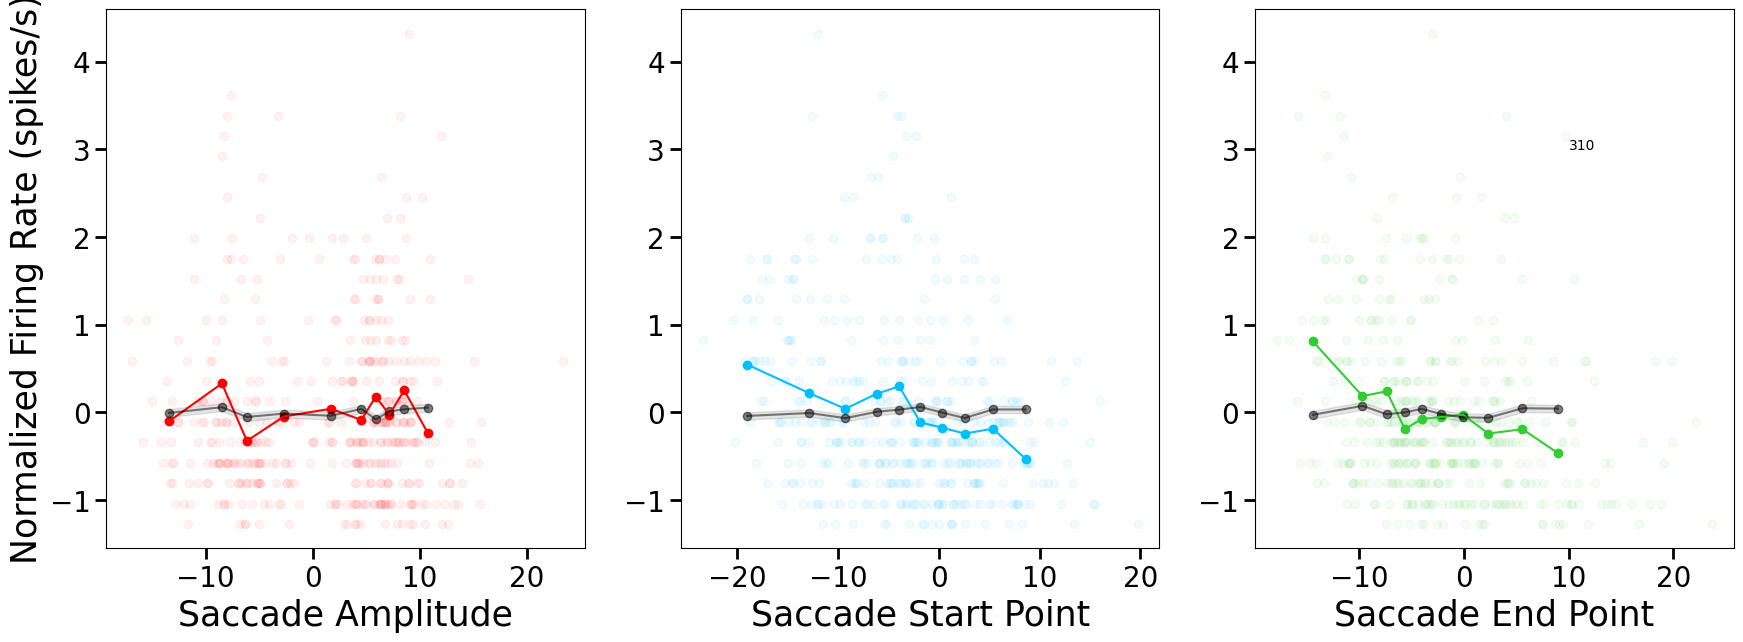

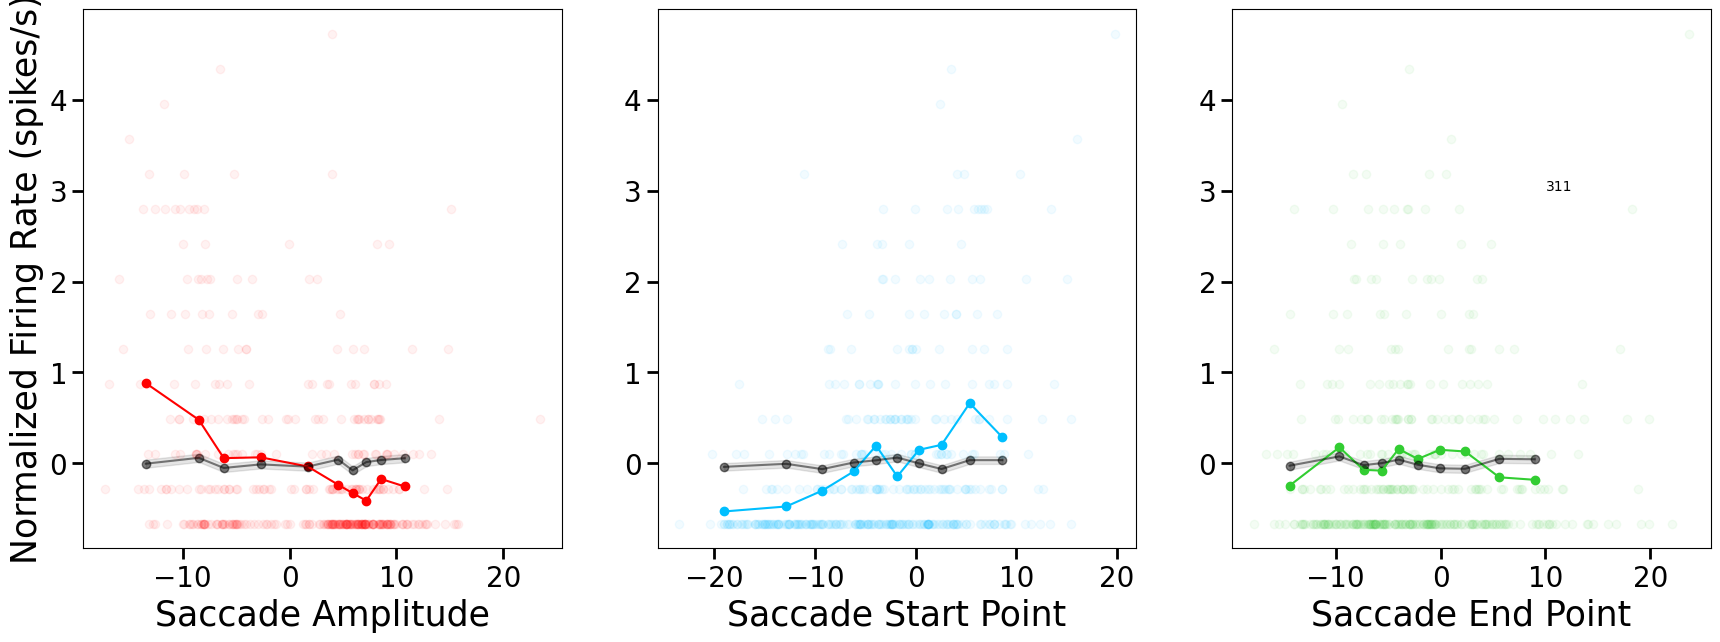

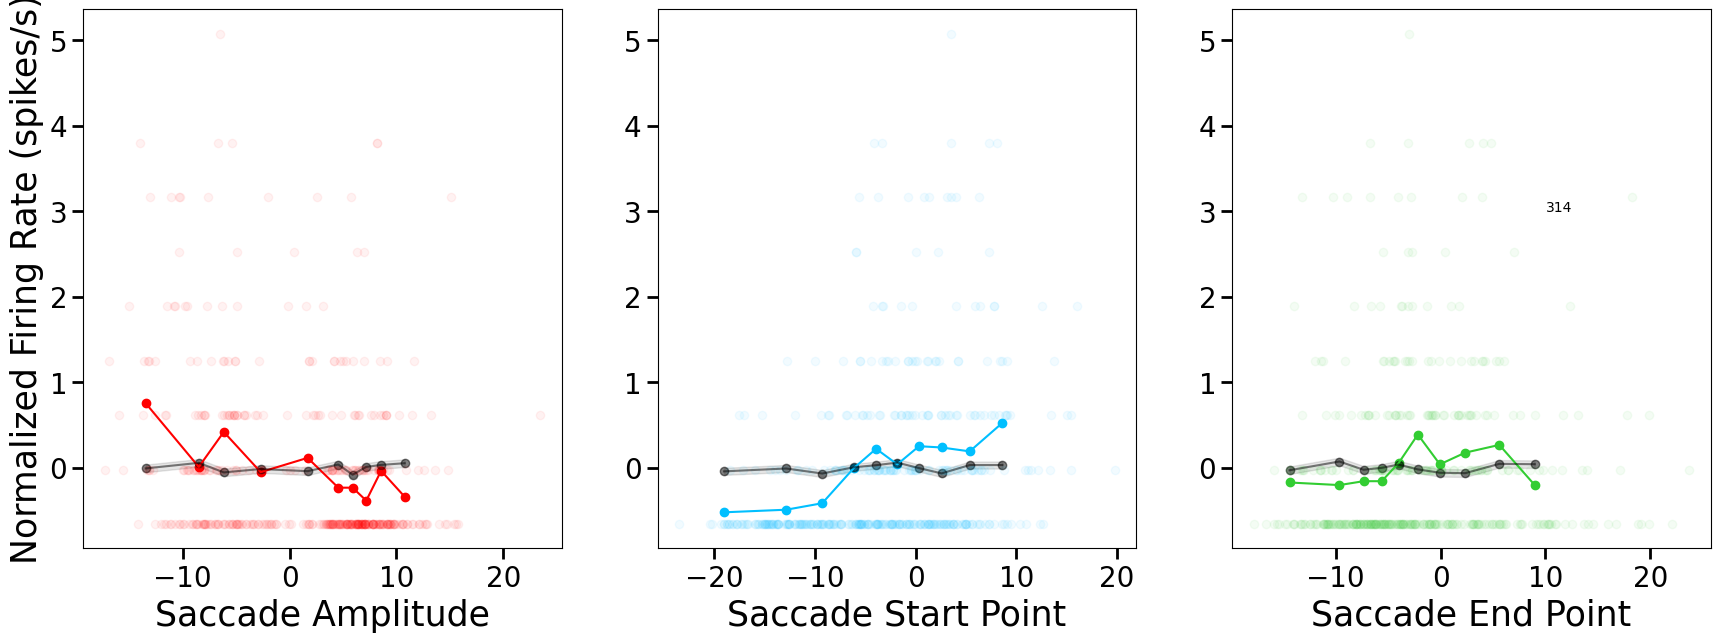

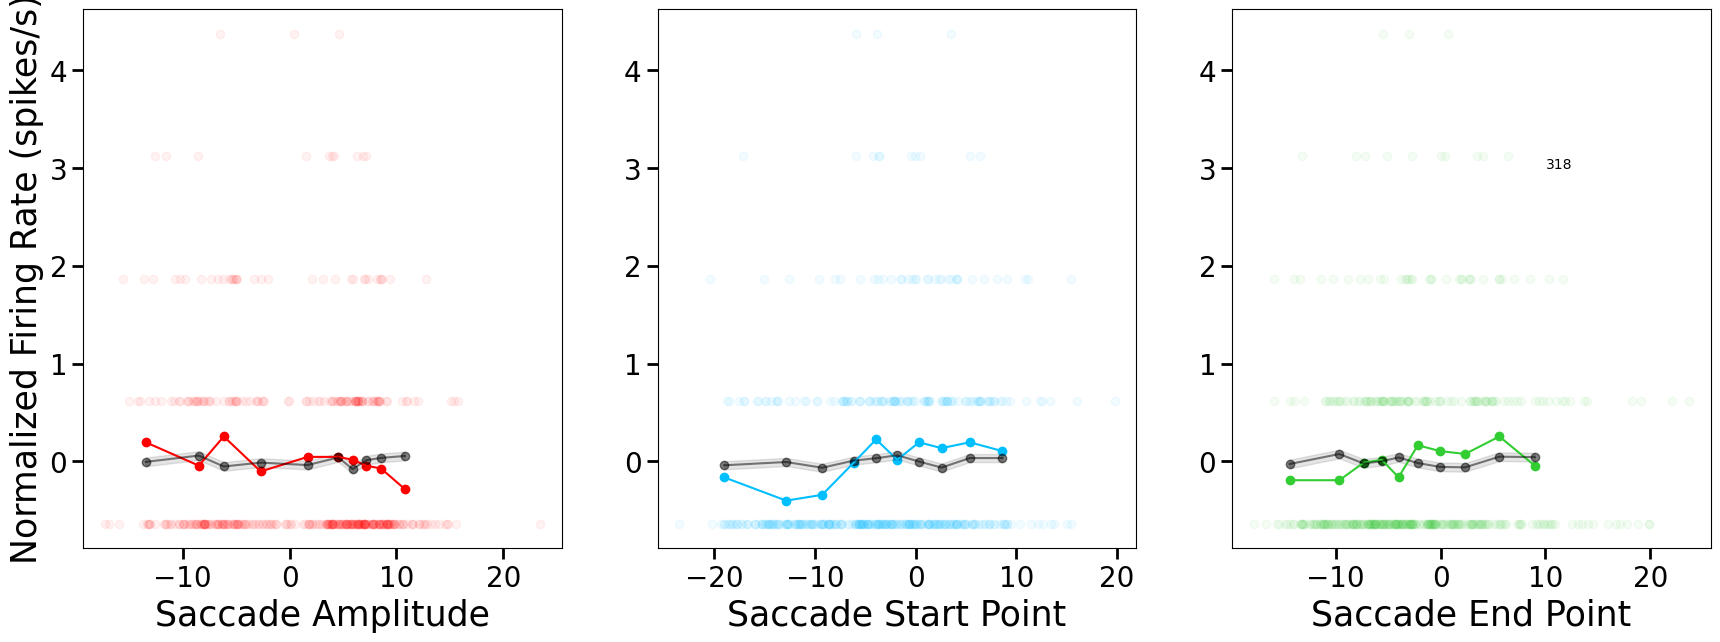

In [9]:
import os
import random
import matplotlib.pyplot as plt
from toolkit.saccades import binFiringRatesbyMetric
from toolkit.saccades import calculateSaccadeAmplitudes, calculateSaccadeStartPoint, calculateSaccadeEndPoint, computeNormalizedFiringRate
for base in fileList[2:3]:
    h5file = os.path.join(base, 'output.hdf')
    session = AnalysisObject(h5file)
    clusterFile = os.path.join(base,'ephys/sorting/manual/spike_clusters.npy')
    premotorUnits = pop.definePremotorPopulation(h5file, clusterFile)
    driven, spontaneous = fs.parseSaccadeType(h5file)
    labels = session.load('saccades/predicted/left/labels')
    ampList = calculateSaccadeAmplitudes(h5file, driven)
    startList = calculateSaccadeStartPoint(h5file, driven)
    endList = calculateSaccadeEndPoint(h5file, driven)
    z = computeNormalizedFiringRate(h5file, premotorUnits, driven, [-0.3, 0])
    shuffAmpFR = list()
    shuffStartFR = list()
    shuffEndFR = list()
    shuffAmpBin = list()
    shuffStartBin = list()
    shuffEndBin = list()
    for idk, unit in enumerate(premotorUnits):
        ampShuffled = random.sample(ampList, len(ampList))
        startShuffled = random.sample(startList, len(startList))
        endShuffled = random.sample(endList, len(endList))
        ampAvgS, startAvgS, endAvgS, binStartAS, binStartSS, binStartES = binFiringRatesbyMetric(z, ampShuffled, startShuffled, endShuffled, idk, 10)
        binMidAS, binMidSS, binMidES = computeBinMiddles(binStartAS, binStartSS, binStartES)
        shuffAmpFR.append(ampAvgS)
        shuffStartFR.append(startAvgS)
        shuffEndFR.append(endAvgS)
        shuffAmpBin.append(binMidAS)
        shuffStartBin.append(binMidSS)
        shuffEndBin.append(binMidES)
    shuffAmpFR = np.mean(shuffAmpFR, axis=0)
    shuffStartFR = np.mean(shuffStartFR, axis=0)
    shuffEndFR = np.mean(shuffEndFR, axis=0)
    shuffAmpBin = np.mean(shuffAmpBin, axis=0)
    shuffStartBin = np.mean(shuffStartBin, axis=0)
    shuffEndBin = np.mean(shuffEndBin, axis=0)
    shuffAmpFRS = np.std(shuffAmpFR, axis=0)
    shuffStartFRS = np.std(shuffStartFR, axis=0)
    shuffEndFRS = np.std(shuffEndFR, axis=0)
    shuffAmpBinS = np.std(shuffAmpBin, axis=0)
    shuffStartBinS = np.std(shuffStartBin, axis=0)
    shuffEndBinS = np.std(shuffEndBin, axis=0)
    for idk, unit in enumerate(premotorUnits):
        fig, ax = plt.subplots(1, 3, figsize=(21, 7))
        ampAvg, startAvg, endAvg, binStartA, binStartS, binStartE = binFiringRatesbyMetric(z, ampList, startList, endList, idk, 10)
        binMidA, binMidS, binMidE = computeBinMiddles(binStartA, binStartS, binStartE) 
       # ampAvgS, startAvgS, endAvgS, binStartAS, binStartSS, binStartES = binFiringRatesbyMetric(z, ampShuffled, startShuffled, endShuffled, idk, 10)
       # binMidAS, binMidSS, binMidES = computeBinMiddles(binStartAS, binStartSS, binStartES)   
        ax[0].plot(binMidA, ampAvg, color='r', alpha=1)
        ax[1].plot(binMidS, startAvg, color='deepskyblue', alpha=1)
        ax[2].plot(binMidE, endAvg, color='limegreen', alpha=1)
        ax[0].scatter(binMidA, ampAvg, color='r', alpha=1)
        ax[1].scatter(binMidS, startAvg, color='deepskyblue', alpha=1)
        ax[2].scatter(binMidE, endAvg, color='limegreen', alpha=1)
        ax[0].plot(shuffAmpBin, shuffAmpFR, color='k', alpha=0.5)
        ax[1].plot(shuffStartBin, shuffStartFR, color='k', alpha=0.5)
        ax[2].plot(shuffEndBin, shuffEndFR, color='k', alpha=0.5)
        ax[0].scatter(shuffAmpBin, shuffAmpFR, color='k', alpha=0.5)
        ax[1].scatter(shuffStartBin, shuffStartFR, color='k', alpha=0.5)
        ax[2].scatter(shuffEndBin, shuffEndFR, color='k', alpha=0.5)
        ax[0].fill_between(shuffAmpBin, shuffAmpFR - shuffAmpFRS, shuffAmpFR + shuffAmpFRS, color='k', alpha=0.1)
        ax[1].fill_between(shuffStartBin, shuffStartFR - shuffStartFRS, shuffStartFR + shuffStartFRS, color='k', alpha=0.1)
        ax[2].fill_between(shuffEndBin, shuffEndFR - shuffEndFRS, shuffEndFR + shuffEndFRS, color='k', alpha=0.1)
        #ax[0].plot(binMidAS, ampAvgS, color='k', alpha=0.5)
        #ax[1].plot(binMidSS, startAvgS, color='k', alpha=0.5)
       # ax[2].plot(binMidES, endAvgS, color='k', alpha=0.5)
       # ax[0].scatter(binMidAS, ampAvgS, color='k', alpha=0.5)
       # ax[1].scatter(binMidSS, startAvgS, color='k', alpha=0.5)
       # ax[2].scatter(binMidES, endAvgS, color='k', alpha=0.5)
        ax[0].scatter(ampList, z[idk, :], color='r', alpha=0.05)
        ax[1].scatter(startList, z[idk, :], color='deepskyblue', alpha=0.05)
        ax[2].scatter(endList, z[idk, :], color='limegreen', alpha=0.05)
        #scat = ax.scatter(startList, endList, c=z[idk, :], alpha=0.75, s=4, vmin=-1, vmax=1.5)
        ax[0].set_xlabel('Saccade Amplitude', fontsize=25)
        ax[1].set_xlabel('Saccade Start Point', fontsize=25)
        ax[2].set_xlabel('Saccade End Point', fontsize=25)
        ax[0].set_ylabel('Normalized Firing Rate (spikes/s)', fontsize=25)
        ax[0].tick_params(axis='both', which='major', labelsize=20, length=8, width=2)
        ax[1].tick_params(axis='both', which='major', labelsize=20, length=8, width=2)
        ax[2].tick_params(axis='both', which='major', labelsize=20, length=8, width=2)


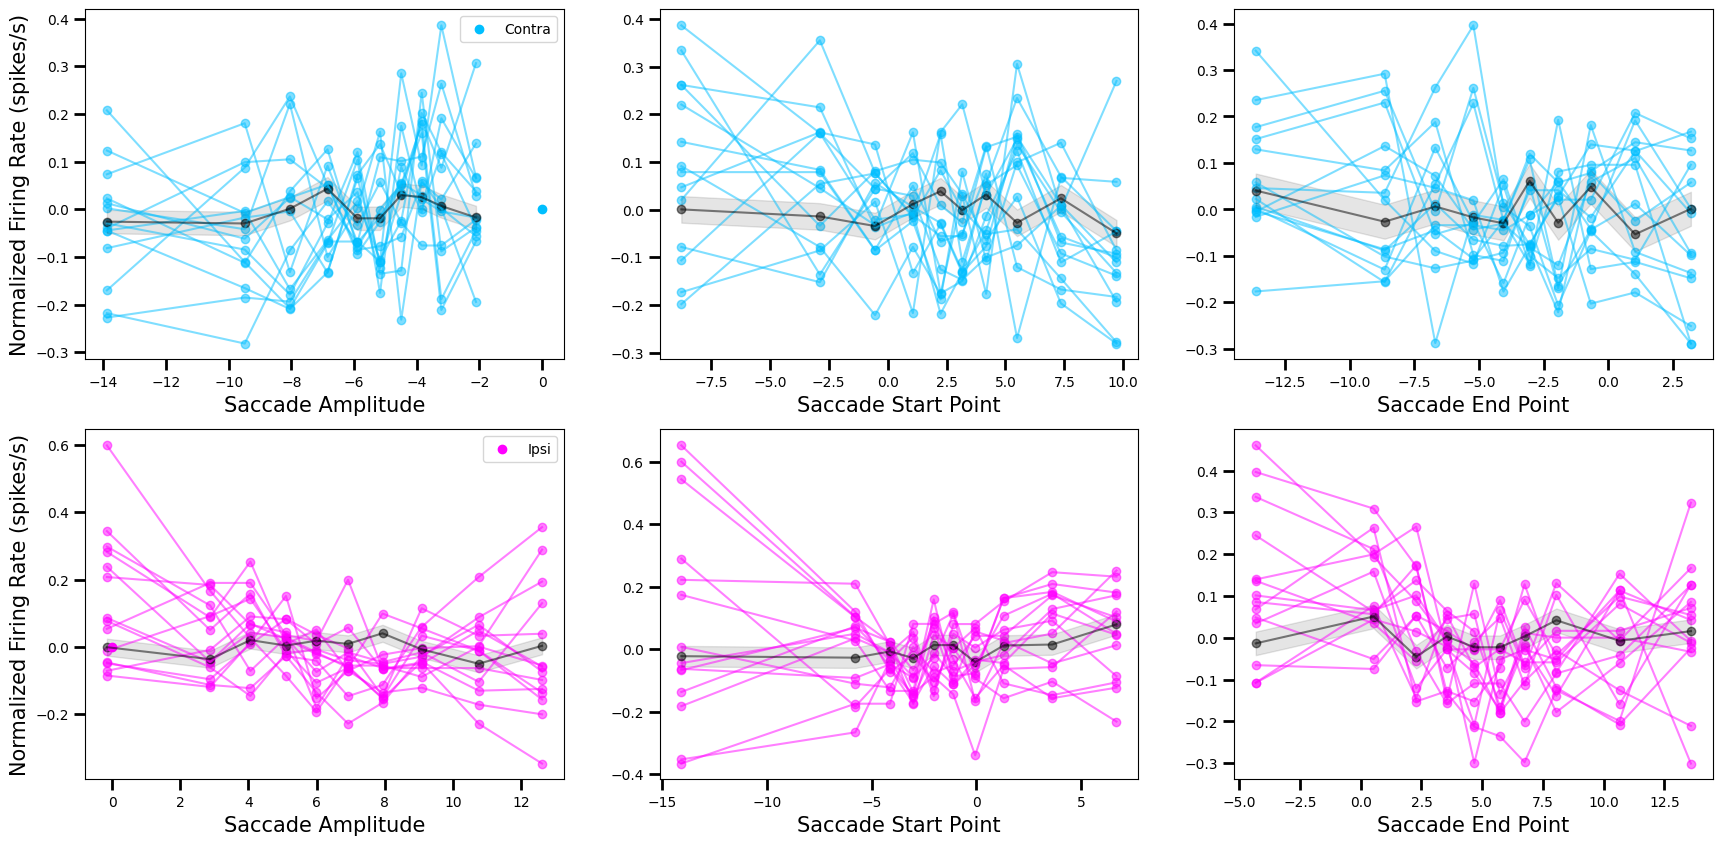

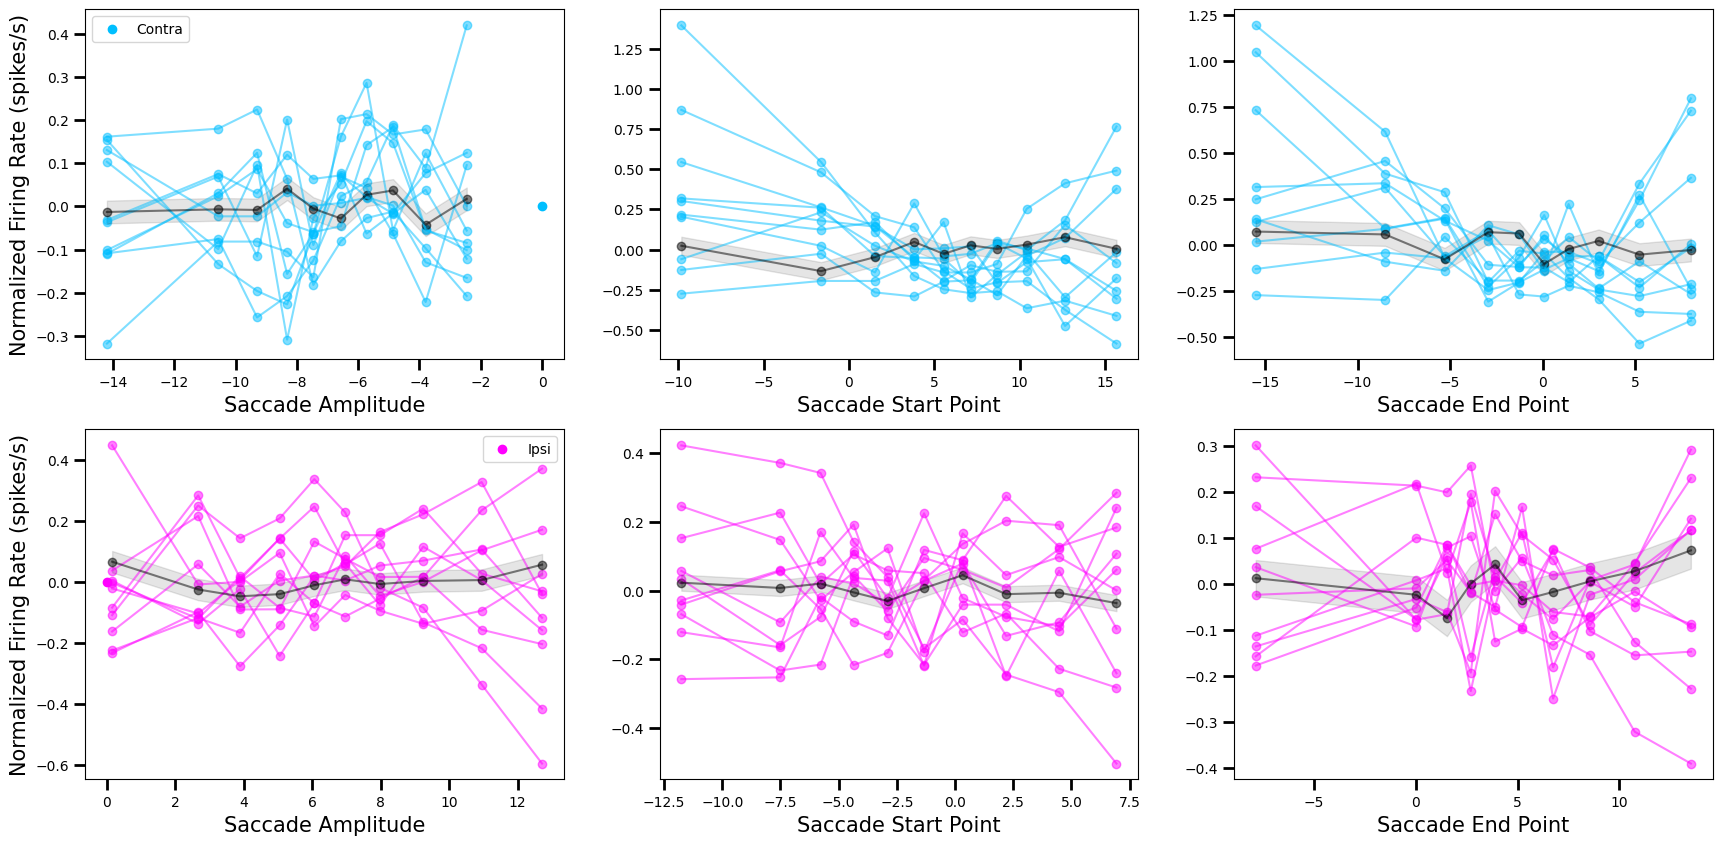

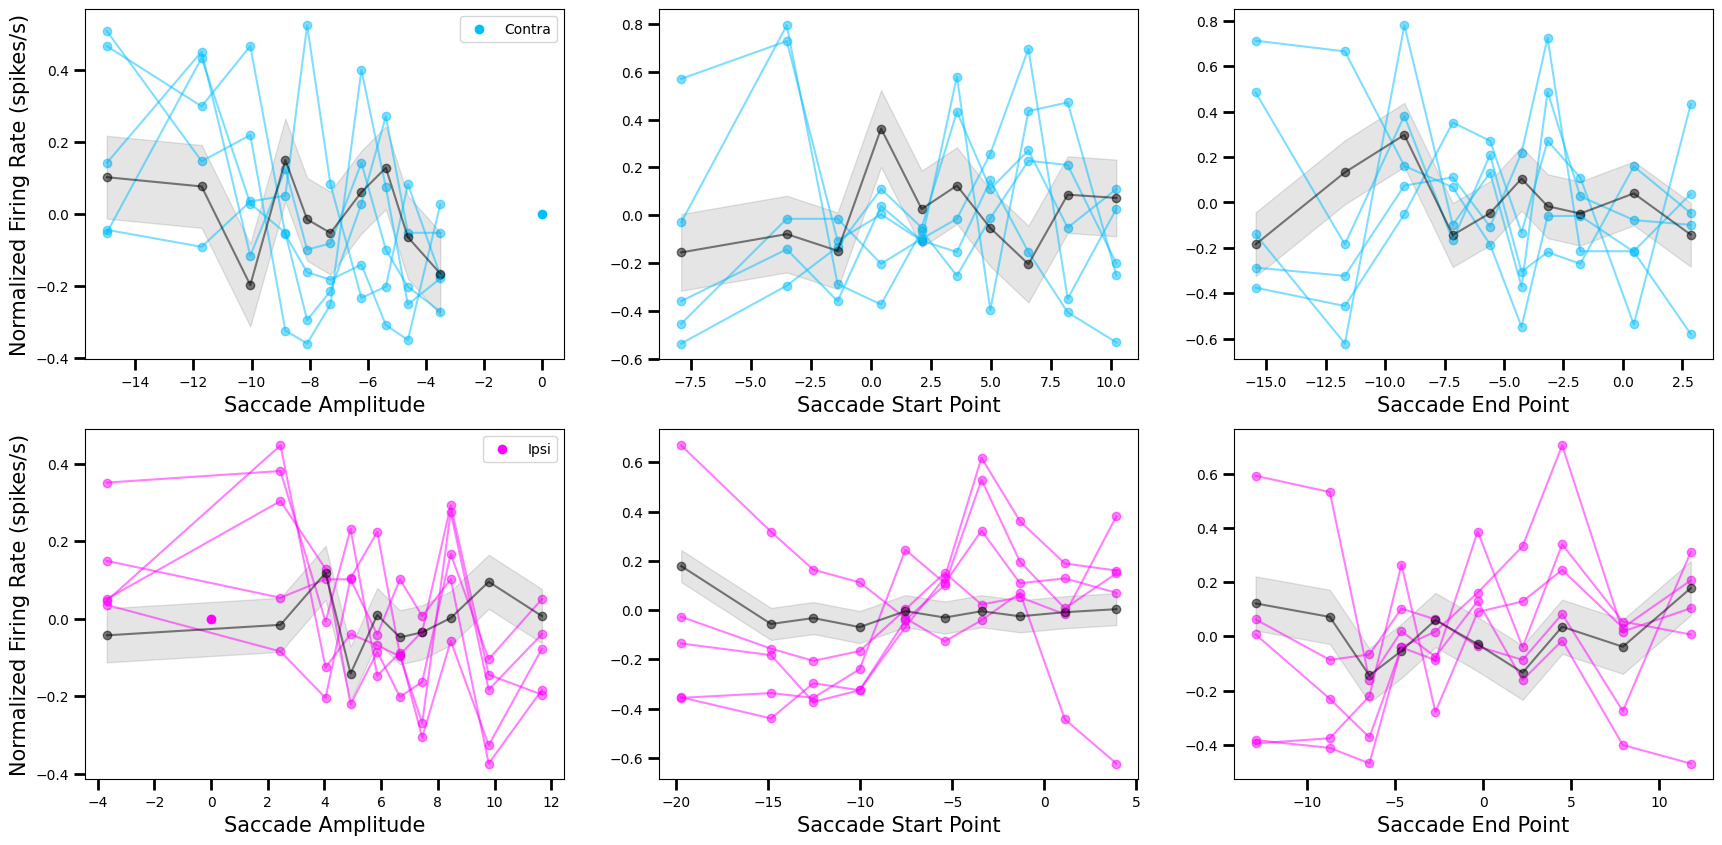

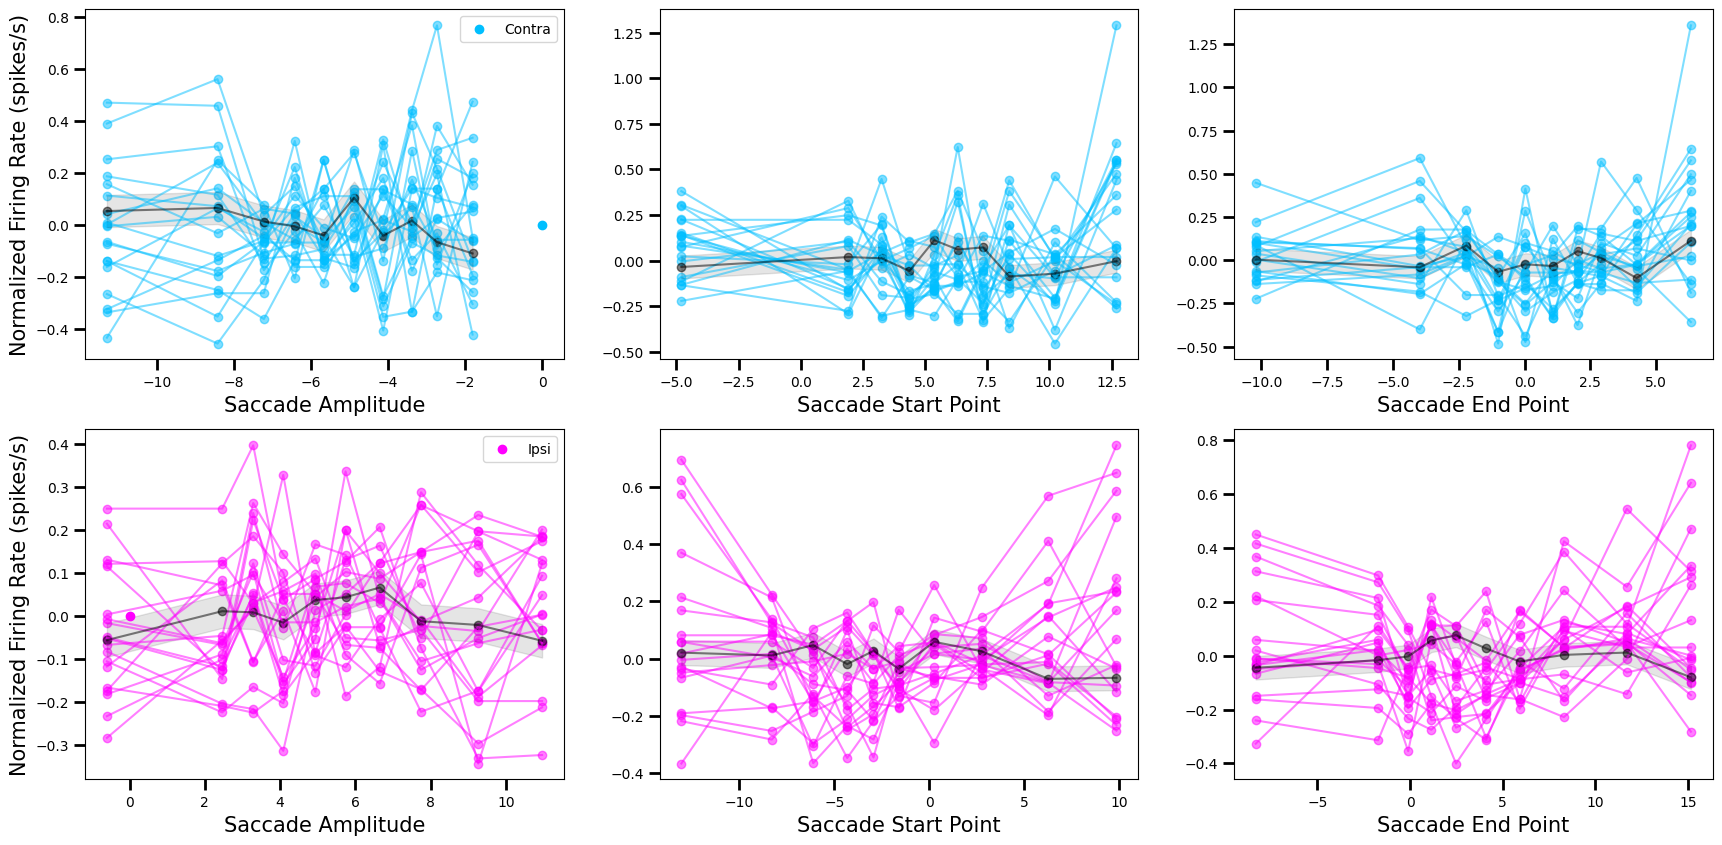

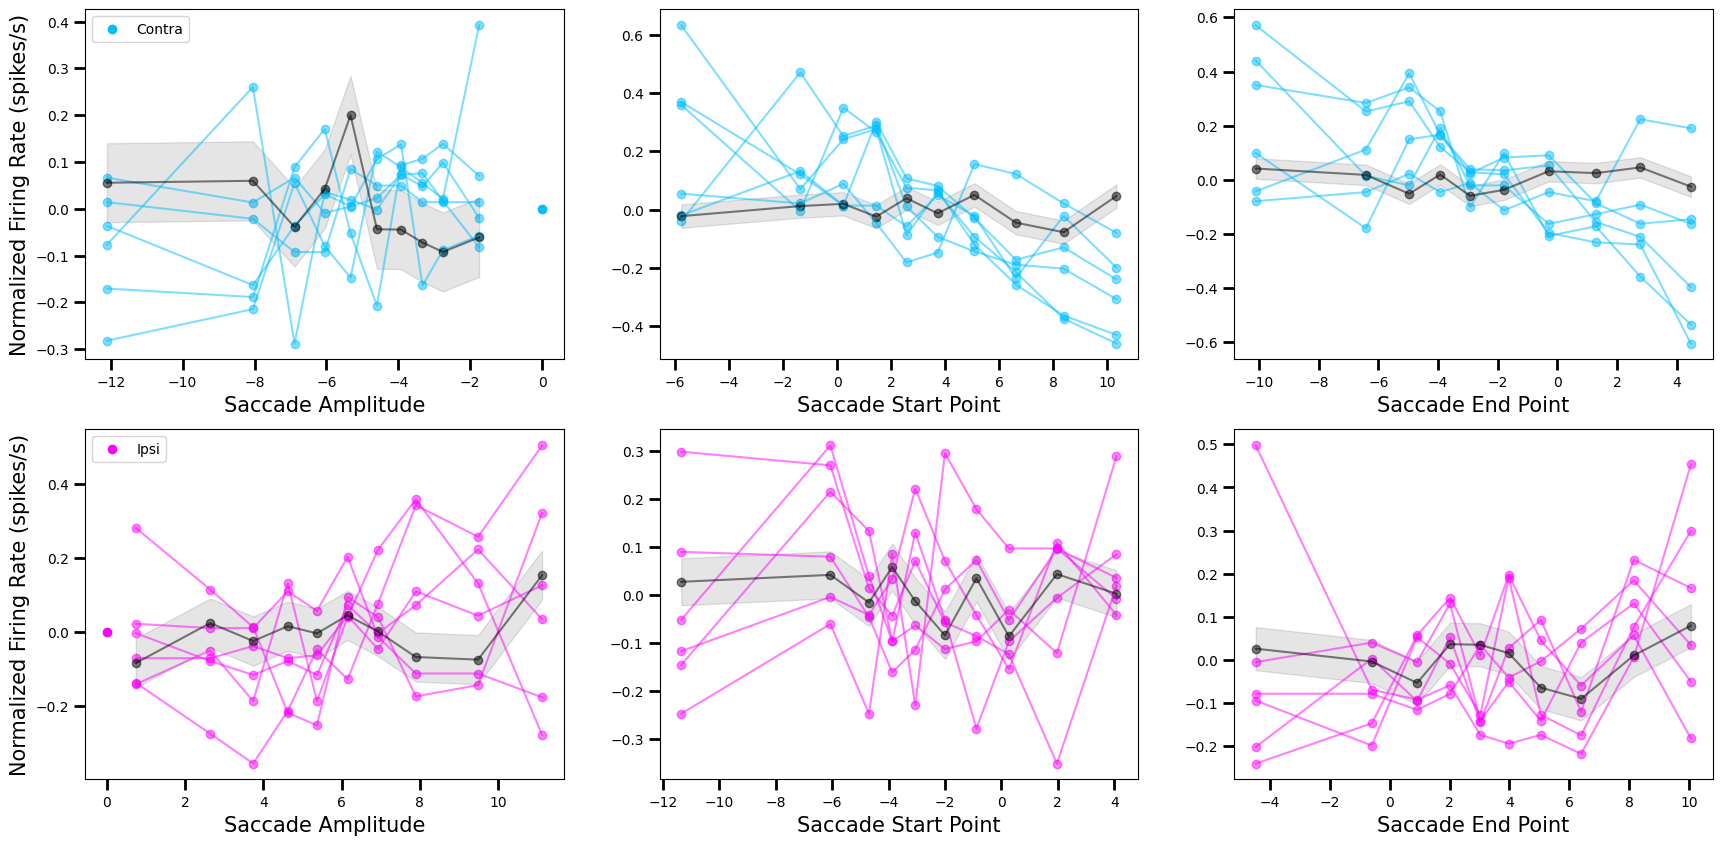

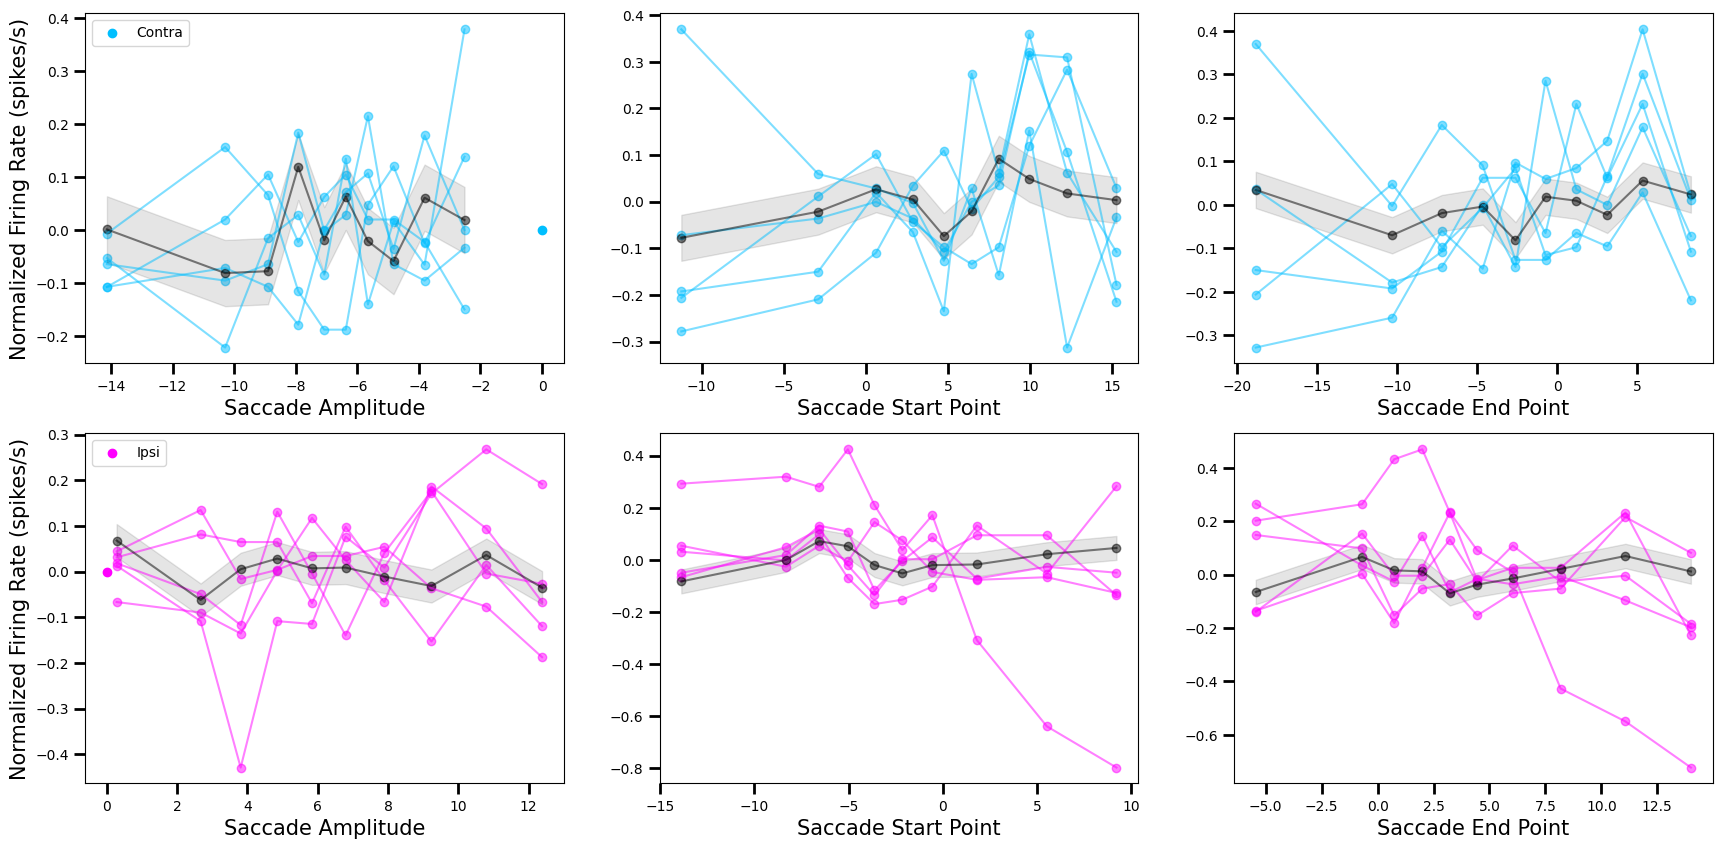

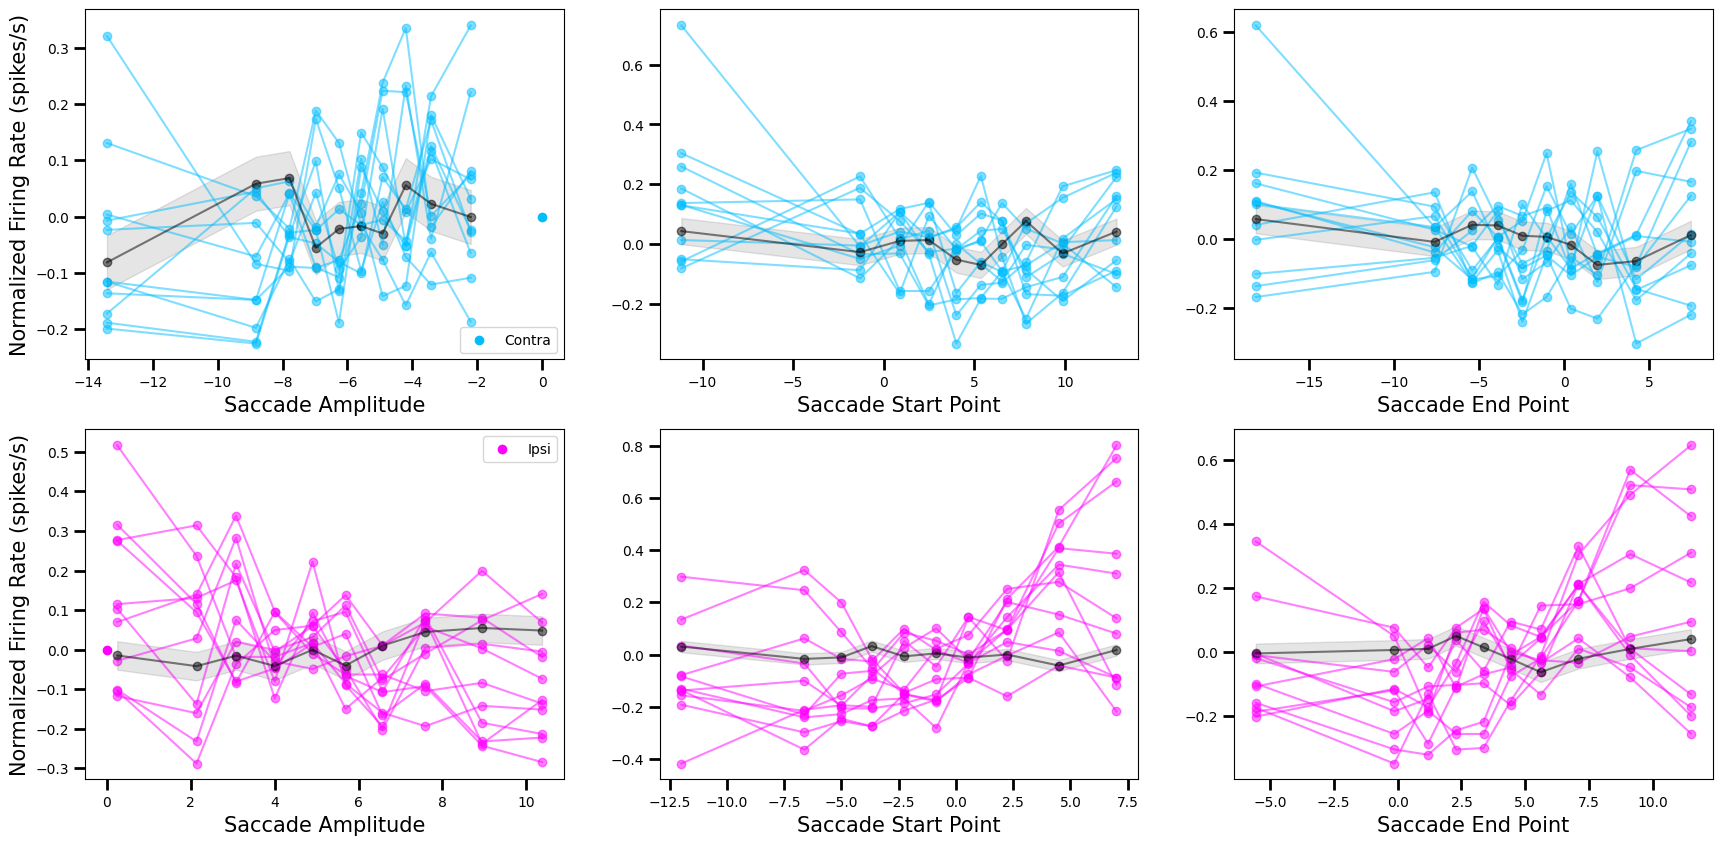

In [278]:
import os
import matplotlib.pyplot as plt
from toolkit.saccades import binFiringRatesbyMetric
from toolkit.saccades import calculateSaccadeAmplitudes, calculateSaccadeStartPoint, calculateSaccadeEndPoint, computeNormalizedFiringRate, computeBinMiddles
for base in fileList:
    fig, ax = plt.subplots(2, 3, figsize=(21, 10))
    h5file = os.path.join(base, 'output.hdf')
    session = AnalysisObject(h5file)
    clusterFile = os.path.join(base,'ephys/sorting/manual/spike_clusters.npy')
    premotorUnits = pop.definePremotorPopulationExclusive(h5file, clusterFile)
    driven, spontaneous = fs.parseSaccadeType(h5file)
    labels = session.load('saccades/predicted/left/labels')
    sacTimes = session.load('saccades/predicted/left/timestamps')
    contraTimes = sacTimes[labels==-1]
    ipsiTimes = sacTimes[labels==1]
    contra = list()
    ipsi = list()
    for sac in driven:
        if sac in contraTimes:
            contra.append(sac)
        if sac in ipsiTimes:
            ipsi.append(sac)
    colors = ['deepskyblue', 'magenta']
    labelsLegend = ['Contra', 'Ipsi']
    for i, sacType in enumerate([contra, ipsi]):
        ampList = calculateSaccadeAmplitudes(h5file, sacType)
        startList = calculateSaccadeStartPoint(h5file, sacType)
        endList = calculateSaccadeEndPoint(h5file, sacType)
        ampShuffled = random.sample(ampList, len(ampList))
        startShuffled = random.sample(startList, len(startList))
        endShuffled = random.sample(endList, len(endList))
        shuffAmpFR = list()
        shuffStartFR = list()
        shuffEndFR = list()
        shuffAmpBin = list()
        shuffStartBin = list()
        shuffEndBin = list()
        z = computeNormalizedFiringRate(h5file, premotorUnits, sacType, [-0.3, 0])
        for idk, unit in enumerate(premotorUnits):
            ampAvgS, startAvgS, endAvgS, binStartAS, binStartSS, binStartES = binFiringRatesbyMetric(z, ampShuffled, startShuffled, endShuffled, idk, 10)
            binMidAS, binMidSS, binMidES = computeBinMiddles(binStartAS, binStartSS, binStartES)
            shuffAmpFR.append(ampAvgS)
            shuffStartFR.append(startAvgS)
            shuffEndFR.append(endAvgS)
            shuffAmpBin.append(binMidAS)
            shuffStartBin.append(binMidSS)
            shuffEndBin.append(binMidES)
            ampAvg, startAvg, endAvg, binStartA, binStartS, binStartE = binFiringRatesbyMetric(z, ampList, startList, endList, idk, 10)
            binMidA, binMidS, binMidE = computeBinMiddles(binStartA, binStartS, binStartE)
            ax[i, 0].plot(binMidA, ampAvg, color=colors[i], alpha=0.5)
            ax[i, 1].plot(binMidS, startAvg, color=colors[i], alpha=0.5)
            ax[i, 2].plot(binMidE, endAvg, color=colors[i], alpha=0.5)
            ax[i, 0].scatter(binMidA, ampAvg, color=colors[i], alpha=0.5)
            ax[i, 1].scatter(binMidS, startAvg, color=colors[i], alpha=0.5)
            ax[i, 2].scatter(binMidE, endAvg, color=colors[i], alpha=0.5)
            #scat = ax.scatter(startList, endList, c=z[idk, :], alpha=0.75, s=4, vmin=-1, vmax=1.5)
        shuffAmpFR = np.mean(shuffAmpFR, axis=0)
        shuffStartFR = np.mean(shuffStartFR, axis=0)
        shuffEndFR = np.mean(shuffEndFR, axis=0)
        shuffAmpBin = np.mean(shuffAmpBin, axis=0)
        shuffStartBin = np.mean(shuffStartBin, axis=0)
        shuffEndBin = np.mean(shuffEndBin, axis=0)
        shuffAmpFRS = np.std(shuffAmpFR, axis=0)
        shuffStartFRS = np.std(shuffStartFR, axis=0)
        shuffEndFRS = np.std(shuffEndFR, axis=0)
        shuffAmpBinS = np.std(shuffAmpBin, axis=0)
        shuffStartBinS = np.std(shuffStartBin, axis=0)
        shuffEndBinS = np.std(shuffEndBin, axis=0)
        ax[i, 0].plot(shuffAmpBin, shuffAmpFR, color='k', alpha=0.5)
        ax[i, 1].plot(shuffStartBin, shuffStartFR, color='k', alpha=0.5)
        ax[i, 2].plot(shuffEndBin, shuffEndFR, color='k', alpha=0.5)
        ax[i, 0].scatter(shuffAmpBin, shuffAmpFR, color='k', alpha=0.5)
        ax[i, 1].scatter(shuffStartBin, shuffStartFR, color='k', alpha=0.5)
        ax[i, 2].scatter(shuffEndBin, shuffEndFR, color='k', alpha=0.5)
        ax[i, 0].fill_between(shuffAmpBin, shuffAmpFR - shuffAmpFRS, shuffAmpFR + shuffAmpFRS, color='k', alpha=0.1)
        ax[i, 1].fill_between(shuffStartBin, shuffStartFR - shuffStartFRS, shuffStartFR + shuffStartFRS, color='k', alpha=0.1)
        ax[i, 2].fill_between(shuffEndBin, shuffEndFR - shuffEndFRS, shuffEndFR + shuffEndFRS, color='k', alpha=0.1)
        ax[i, 0].set_xlabel('Saccade Amplitude', fontsize=15)
        ax[i, 1].set_xlabel('Saccade Start Point', fontsize=15)
        ax[i, 2].set_xlabel('Saccade End Point', fontsize=15)
        ax[i, 0].set_ylabel('Normalized Firing Rate (spikes/s)', fontsize=15)
        ax[i, 0].tick_params(axis='both', which='major', length=8, width=2)
        ax[i, 1].tick_params(axis='both', which='major', length=8, width=2)
        ax[i, 2].tick_params(axis='both', which='major', length=8, width=2)
        ax[i, 0].scatter(0, 0, color=colors[i], label=labelsLegend[i])
        ax[i, 0].legend()

In [249]:
import os
import matplotlib.pyplot as plt
from scipy import stats
from toolkit.saccades import binFiringRatesbyMetric
from toolkit.saccades import calculateSaccadeAmplitudes, calculateSaccadeStartPoint, calculateSaccadeEndPoint, computeNormalizedFiringRate, computeBinMiddles, binFiringRatesTrialByTrial
sigDict = {identity: {'contra': [], 'ipsi': []} for identity in ['amplitude', 'start', 'end']}
for base in fileList:
    h5file = os.path.join(base, 'output.hdf')
    session = AnalysisObject(h5file)
    clusterFile = os.path.join(base,'ephys/sorting/manual/spike_clusters.npy')
    premotorUnits = pop.definePremotorPopulationExclusive(h5file, clusterFile)
    driven, spontaneous = fs.parseSaccadeType(h5file)
    labels = session.load('saccades/predicted/left/labels')
    sacTimes = session.load('saccades/predicted/left/timestamps')
    contraTimes = sacTimes[labels==-1]
    ipsiTimes = sacTimes[labels==1]
    for sac in driven:
        if sac in contraTimes:
            contra.append(sac)
        if sac in ipsiTimes:
            ipsi.append(sac)
    colors = ['deepskyblue', 'magenta']
    labelsLegend = ['Contra', 'Ipsi']
    for i, sacType in enumerate([contra, ipsi]):
        ampList = calculateSaccadeAmplitudes(h5file, sacType)
        startList = calculateSaccadeStartPoint(h5file, sacType)
        endList = calculateSaccadeEndPoint(h5file, sacType)
        z = computeNormalizedFiringRate(h5file, premotorUnits, sacType, [-0.3, 0])
        for idk, unit in enumerate(premotorUnits):
           # ampAvg, startAvg, endAvg, binStartA, binStartS, binStartE = binFiringRatesbyMetric(z, ampList, startList, endList, idk, 3)
            ampFR, startFR, endFR = binFiringRatesTrialByTrial(z, ampList, startList, endList, idk, 3)
            if i == 0:
                frAmpLarge = ampFR[0]
                frAmpSmall = ampFR[2]
                t, ampP = stats.ttest_ind(frAmpLarge, frAmpSmall, nan_policy='omit')
                if ampP < 0.05:
                    if np.nanmean(frAmpLarge) > np.nanmean(frAmpSmall):
                        sigDict['amplitude']['contra'].append(1)
                    else:
                        sigDict['amplitude']['contra'].append(0)
                frStartLarge = startFR[2]
                frStartSmall = startFR[0]
                t, startP = stats.ttest_ind(frStartLarge, frStartSmall, nan_policy='omit')
                if startP < 0.05:
                    if np.nanmean(frStartLarge) > np.nanmean(frStartSmall):
                        sigDict['start']['contra'].append(1)
                    else:
                        sigDict['start']['contra'].append(0)                        
                frEndLarge = endFR[0]
                frEndSmall = endFR[2]
                t, endP = stats.ttest_ind(frEndLarge, frEndSmall, nan_policy='omit')
                if endP < 0.05:
                    if np.nanmean(frEndLarge) > np.nanmean(frEndSmall):
                        sigDict['end']['contra'].append(1)
                    else:
                        sigDict['end']['contra'].append(0)                     
              #  codes = ['big', 'medium', 'small']
               # for value in [0, 1, 2]:
                #    if ampAvg[value] > (shuffAmpFR[value] + shuffAmpFRS):
                 #       metricDict['amplitude'][codes[value]].append(unit)
                  #  if startAvg[value] > (shuffStartFR[value] + shuffStartFRS):
                   #     metricDict['start'][codes[value]].append(unit)
                    #if endAvg[value] > (shuffEndFR[value] + shuffEndFRS):
                     #   metricDict['end'][codes[value]].append(unit)
            if i == 1:
                frAmpLarge = ampFR[2]
                frAmpSmall = ampFR[0]
                t, ampP = stats.ttest_ind(frAmpLarge, frAmpSmall, nan_policy='omit')
                if ampP < 0.05:
                    if np.nanmean(frAmpLarge) > np.nanmean(frAmpSmall):
                        sigDict['amplitude']['ipsi'].append(1)
                    else:
                        sigDict['amplitude']['ipsi'].append(0)
                frStartLarge = startFR[0]
                frStartSmall = startFR[2]
                t, startP = stats.ttest_ind(frStartLarge, frStartSmall, nan_policy='omit')
                if startP < 0.05:
                    if np.nanmean(frStartLarge) > np.nanmean(frStartSmall):
                        sigDict['start']['ipsi'].append(1)
                    else:
                        sigDict['start']['ipsi'].append(0)  
                frEndLarge = endFR[2]
                frEndSmall = endFR[0]
                t, endP = stats.ttest_ind(frEndLarge, frEndSmall, nan_policy='omit')
                if endP < 0.05:
                    if np.nanmean(frEndLarge) > np.nanmean(frEndSmall):
                        sigDict['end']['ipsi'].append(1)
                    else:
                        sigDict['end']['ipsi'].append(0)  
            #    codes = ['small', 'medium', 'big']
             #   for value in [0, 1, 2]:
              #      if ampAvg[value] > (shuffAmpFR[value] + shuffAmpFRS):
               #         metricDict['amplitude'][codes[value]].append(unit)
                #    if startAvg[value] > (shuffStartFR[value] + shuffStartFRS):
                 #       metricDict['start'][codes[value]].append(unit)
                  #  if endAvg[value] > (shuffEndFR[value] + shuffEndFRS):
                   #     metricDict['end'][codes[value]].append(unit)      
            

In [237]:
totalUnits = list()
for base in fileList:
    h5file = os.path.join(base, 'output.hdf')
    session = AnalysisObject(h5file)
    clusterFile = os.path.join(base,'ephys/sorting/manual/spike_clusters.npy')
    premotorUnits = pop.definePremotorPopulationExclusive(h5file, clusterFile)
    totalUnits.append(len(premotorUnits))
print(totalUnits)
print(sum(totalUnits))

[14, 10, 5, 19, 6, 5, 11]
70


In [257]:
len(np.where(np.array(sigDict['amplitude']['ipsi'])==1)[0])

16

(0.0, 0.4)

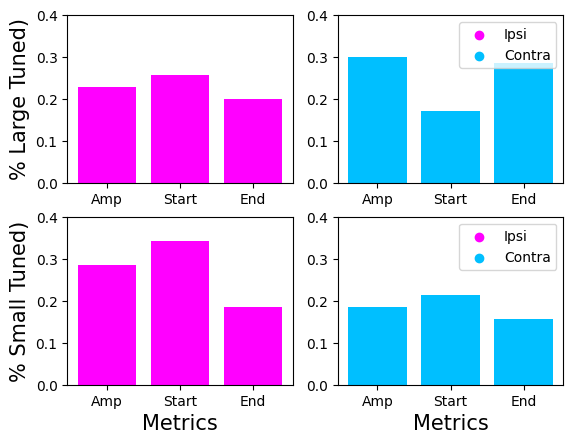

In [261]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].bar(['Amp', 'Start', 'End'], [len(np.where(np.array(sigDict['amplitude']['ipsi'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['ipsi'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['ipsi'])==1)[0])/sum(totalUnits)], color='magenta')
ax[0, 1].bar(['Amp', 'Start', 'End'], [len(np.where(np.array(sigDict['amplitude']['contra'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['contra'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['contra'])==1)[0])/sum(totalUnits)], color='deepskyblue')
ax[1, 0].bar(['Amp', 'Start', 'End'], [len(np.where(np.array(sigDict['amplitude']['ipsi'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['ipsi'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['ipsi'])==0)[0])/sum(totalUnits)], color='magenta')
ax[1, 1].bar(['Amp', 'Start', 'End'], [len(np.where(np.array(sigDict['amplitude']['contra'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['contra'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['contra'])==0)[0])/sum(totalUnits)], color='deepskyblue')
ax[0, 1].scatter(0, -0.5, color='magenta', label='Ipsi')
ax[0, 1].scatter(0, -0.5, color='deepskyblue', label='Contra')
ax[1, 1].scatter(0, -0.5, color='magenta', label='Ipsi')
ax[1, 1].scatter(0, -0.5, color='deepskyblue', label='Contra')
ax[0, 1].legend()
ax[0, 0].tick_params(axis='both', which='major', labelsize=10)
ax[0, 1].tick_params(axis='both', which='major', labelsize=10)
ax[1, 1].legend()
ax[1, 0].tick_params(axis='both', which='major', labelsize=10)
ax[1, 1].tick_params(axis='both', which='major', labelsize=10)
ax[1, 0].set_xlabel('Metrics', fontsize=15)
ax[1, 1].set_xlabel('Metrics', fontsize=15)
ax[0, 0].set_ylabel('% Large Tuned)', fontsize=15)
ax[1, 0].set_ylabel('% Small Tuned)', fontsize=15)
ax[0, 0].set_ylim(0, 0.4)
ax[0, 1].set_ylim(0, 0.4)
ax[1, 0].set_ylim(0, 0.4)
ax[1, 1].set_ylim(0, 0.4)

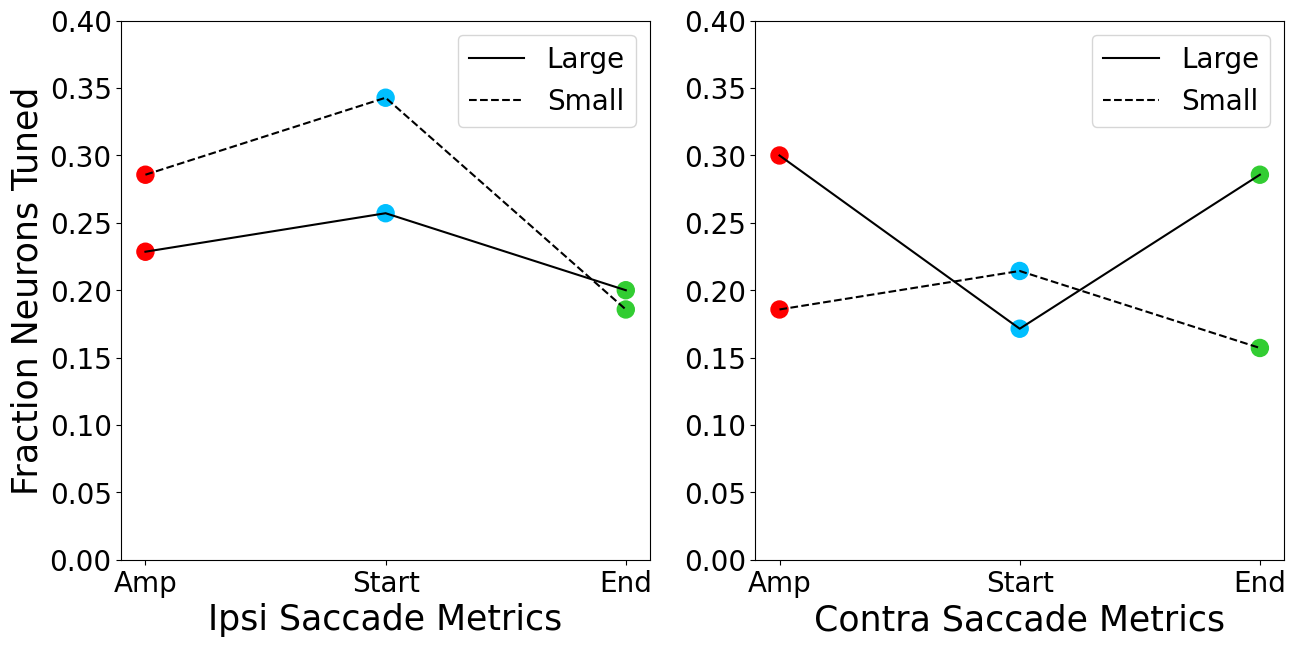

In [286]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
colors=['r', 'deepskyblue', 'limegreen']
ax[0].plot([0, 1, 2],  [len(np.where(np.array(sigDict['amplitude']['ipsi'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['ipsi'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['ipsi'])==1)[0])/sum(totalUnits)], color='k',linestyle='-', label='Large')
ax[1].plot([0, 1, 2], [len(np.where(np.array(sigDict['amplitude']['contra'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['contra'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['contra'])==1)[0])/sum(totalUnits)], color='k', linestyle='-', label='Large')
ax[0].plot([0, 1, 2], [len(np.where(np.array(sigDict['amplitude']['ipsi'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['ipsi'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['ipsi'])==0)[0])/sum(totalUnits)], color='k',linestyle='--', label='Small')
ax[1].plot([0, 1, 2], [len(np.where(np.array(sigDict['amplitude']['contra'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['contra'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['contra'])==0)[0])/sum(totalUnits)], color='k',linestyle='--', label='Small')
ax[0].scatter([0, 1, 2],  [len(np.where(np.array(sigDict['amplitude']['ipsi'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['ipsi'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['ipsi'])==1)[0])/sum(totalUnits)], s=150, color=colors)
ax[1].scatter([0, 1, 2], [len(np.where(np.array(sigDict['amplitude']['contra'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['contra'])==1)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['contra'])==1)[0])/sum(totalUnits)], s=150, color=colors)
ax[0].scatter([0, 1, 2], [len(np.where(np.array(sigDict['amplitude']['ipsi'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['ipsi'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['ipsi'])==0)[0])/sum(totalUnits)], s=150, color=colors)
ax[1].scatter([0, 1, 2], [len(np.where(np.array(sigDict['amplitude']['contra'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['start']['contra'])==0)[0])/sum(totalUnits), len(np.where(np.array(sigDict['end']['contra'])==0)[0])/sum(totalUnits)], s=150, color=colors)
ax[0].set_xticks([0, 1, 2])
ax[1].set_xticks([0, 1, 2])
ax[0].set_xticklabels(['Amp', 'Start', 'End'], fontsize=20)
ax[1].set_xticklabels(['Amp', 'Start', 'End'], fontsize=20)
ax[0].set_xlabel('Ipsi Saccade Metrics', fontsize=25)
ax[1].set_xlabel('Contra Saccade Metrics', fontsize=25)
ax[0].set_ylabel('Fraction Neurons Tuned', fontsize=25)
ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)
ax[0].set_ylim(0, 0.4)
ax[1].set_ylim(0, 0.4)  
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)


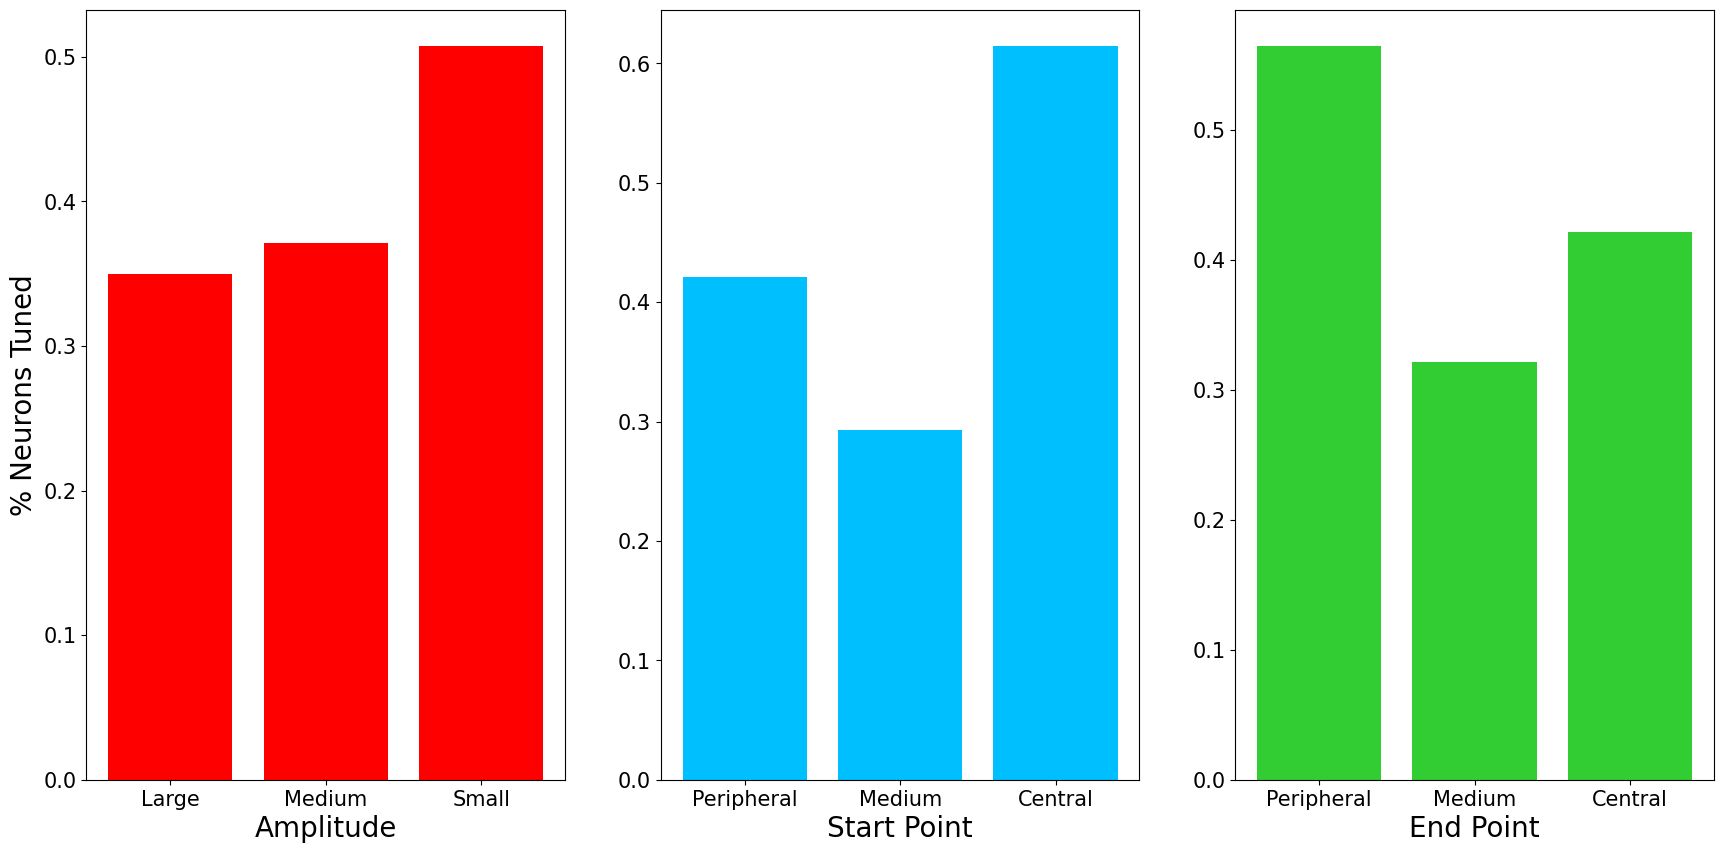

In [228]:
fig, ax = plt.subplots(1, 3, figsize=(21, 10))
ax[0].bar(['Large', 'Medium', 'Small'], [len(metricDict['amplitude']['big'])/(sum(totalUnits)*2), len(metricDict['amplitude']['medium'])/(sum(totalUnits)*2), len(metricDict['amplitude']['small'])/(sum(totalUnits)*2)], color='r')
ax[1].bar(['Peripheral', 'Medium', 'Central'], [len(metricDict['start']['small'])/(sum(totalUnits)*2), len(metricDict['start']['medium'])/(sum(totalUnits)*2), len(metricDict['start']['big'])/(sum(totalUnits)*2)], color='deepskyblue')
ax[2].bar(['Peripheral', 'Medium', 'Central'], [len(metricDict['end']['big'])/(sum(totalUnits)*2), len(metricDict['end']['medium'])/(sum(totalUnits)*2), len(metricDict['end']['small'])/(sum(totalUnits)*2)], color='limegreen')
ax[0].set_xlabel('Amplitude', fontsize=20)
ax[1].set_xlabel('Start Point', fontsize=20)
ax[2].set_xlabel('End Point', fontsize=20)
ax[0].set_ylabel('% Neurons Tuned', fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[2].tick_params(axis='both', which='major', labelsize=15)

Event 0 is NaN
Event 4 is NaN
Event 7 is NaN
Event 14 is NaN
Event 23 is NaN
Event 28 is NaN
Event 33 is NaN
Event 68 is NaN
Event 78 is NaN
Event 82 is NaN
Event 84 is NaN
Event 93 is NaN
Event 94 is NaN
Event 97 is NaN
Event 187 is NaN
Event 190 is NaN
Event 191 is NaN
Event 192 is NaN
Event 214 is NaN
Event 238 is NaN
Event 241 is NaN
Event 249 is NaN
Event 267 is NaN
Event 287 is NaN
Event 288 is NaN
Event 307 is NaN
Event 310 is NaN
Event 311 is NaN
Event 313 is NaN
Event 324 is NaN
Event 326 is NaN
Event 338 is NaN
Event 365 is NaN
Event 370 is NaN
Event 386 is NaN
Event 387 is NaN
Event 442 is NaN
Event 443 is NaN
Event 455 is NaN
Event 458 is NaN
212
212
212
212
212
212
212
212
212
212
212
212
212
212


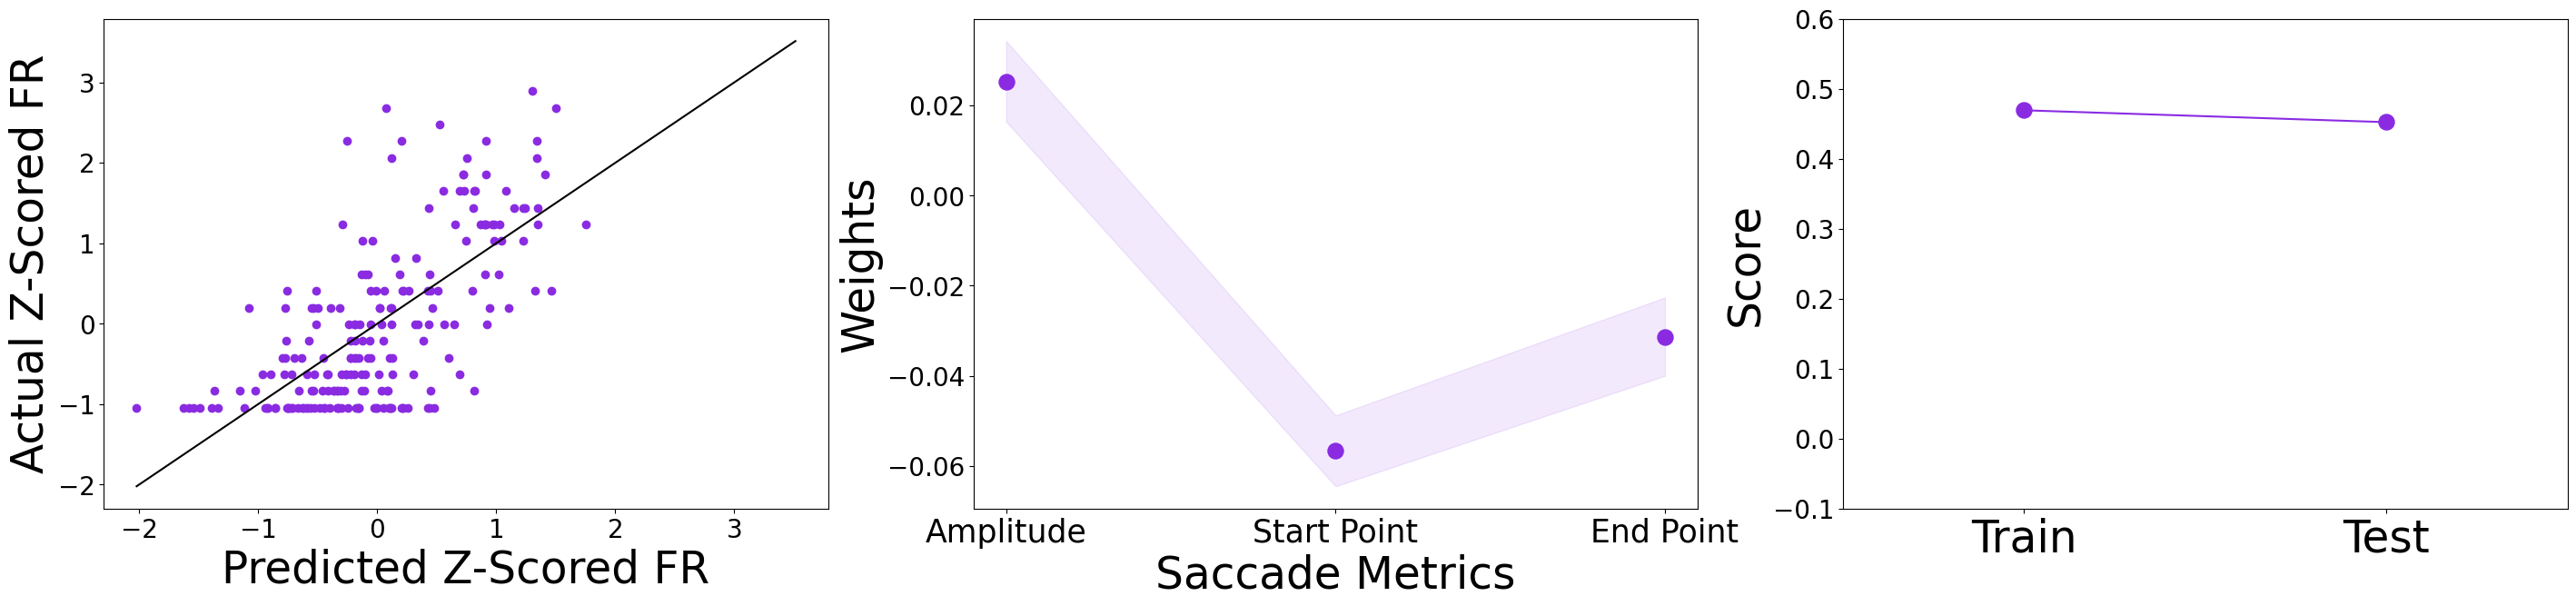

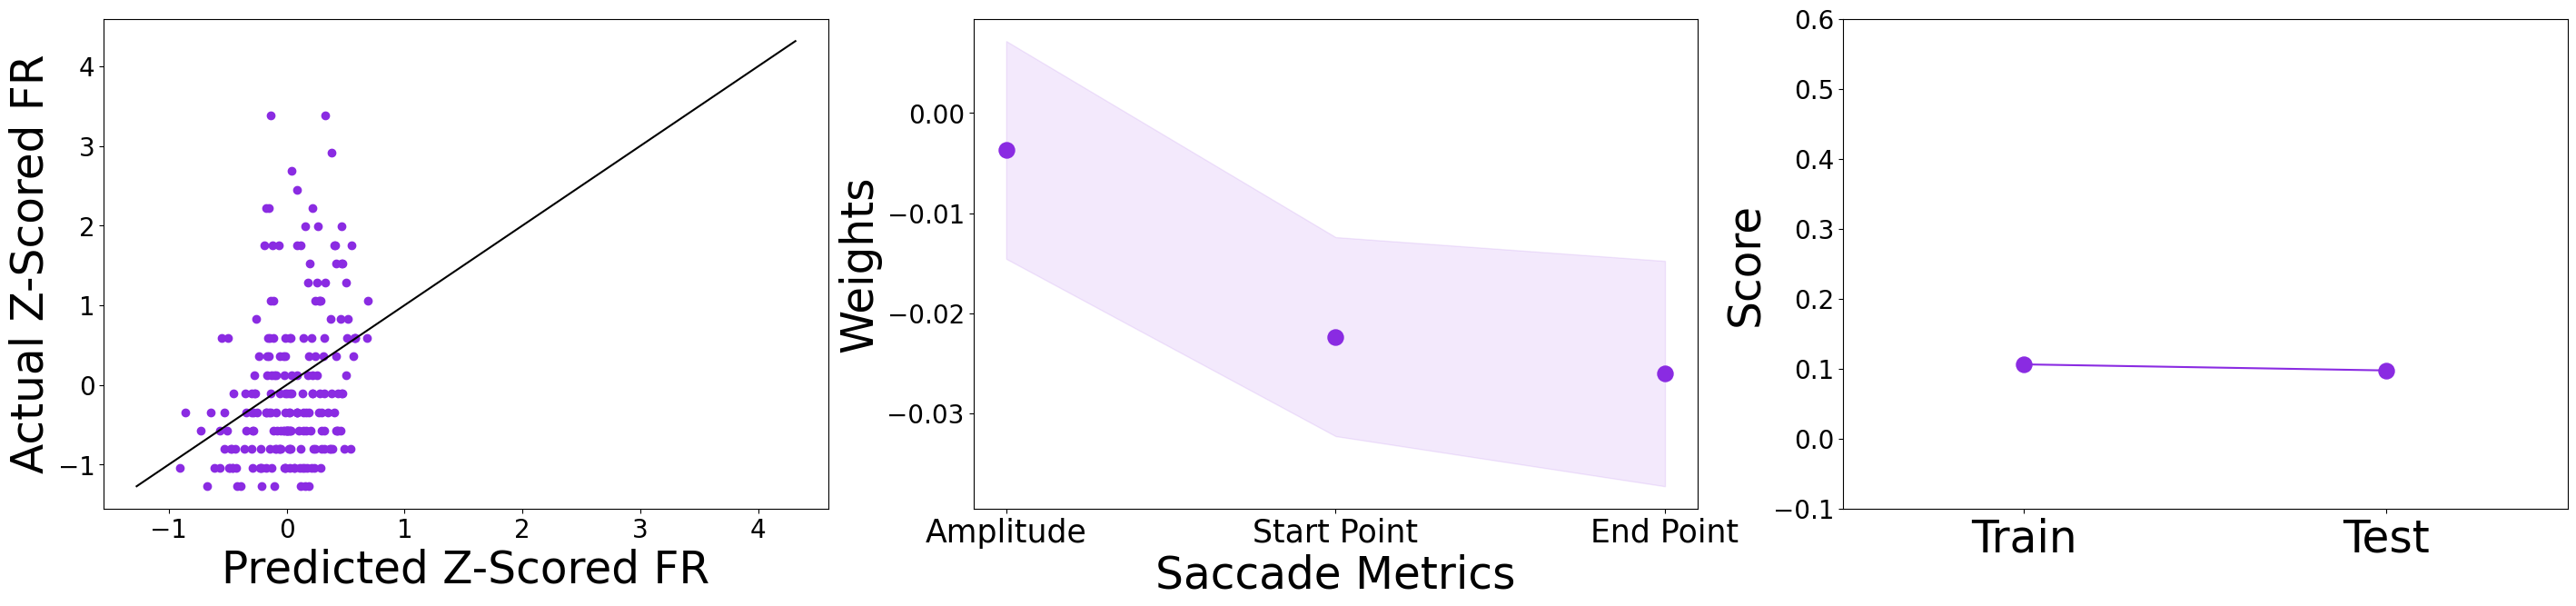

In [18]:
from toolkit.saccades import generateSaccadeMetricArray
from toolkit.prediction import predictSingleUnitActivity
from toolkit.saccades import calculateSaccadeAmplitudes, calculateSaccadeStartPoint, calculateSaccadeEndPoint, computeNormalizedFiringRate, computeBinMiddles, binFiringRatesTrialByTrial
import matplotlib.pyplot as plt
scores = list()
amp=list()
start=list()
end=list()
for base in fileList[2:3]:
    h5file = os.path.join(base, 'output.hdf')
    session = AnalysisObject(h5file)
    clusterFile = os.path.join(base,'ephys/sorting/manual/spike_clusters.npy')
    premotorUnits = pop.definePremotorPopulation(h5file, clusterFile)
    driven, spontaneous = fs.parseSaccadeType(h5file)
    labels = session.load('saccades/predicted/left/labels')
    ampList = calculateSaccadeAmplitudes(h5file, driven)
    startList = calculateSaccadeStartPoint(h5file, driven)
    endList = calculateSaccadeEndPoint(h5file, driven)
    sacMetrics = generateSaccadeMetricArray(h5file, ampList, startList, endList)
    trialsToAnalyze = range(0, len(sacMetrics[:, 0]))
    population = session._population()
    z = computeNormalizedFiringRate(h5file, premotorUnits, driven, [-0.3, 0])
    for unitActivity in z:
        predicted, weights, lowerCI, upperCI, scoreTrain, scoreTest, test_half = predictSingleUnitActivity(trialsToAnalyze, sacMetrics, unitActivity)
        scores.append(scoreTest)
        amp.append(weights[0])
        start.append(weights[1])
        end.append(weights[2])
        if scoreTest > 0.05:
            fig, ax = plt.subplots(1, 3, figsize=(35, 7))
            ax[0].scatter(predicted, unitActivity[test_half], color = 'blueviolet')
            ax[0].set_xlabel('Predicted Z-Scored FR', fontsize=35)
            ax[0].set_ylabel('Actual Z-Scored FR', fontsize=35)
            maxPredict = np.max(predicted)
            maxActual = np.max(unitActivity)
            minPredict = np.min(predicted)
            minActual = np.min(unitActivity)
            if maxPredict > maxActual:
                if minPredict < minActual:
                    ax[0].plot((minPredict, maxPredict), (minPredict, maxPredict), color = 'k')
                else:
                    ax[0].plot((minActual, maxPredict), (minActual, maxPredict), color = 'k')

            else:
                if minPredict < minActual:
                    ax[0].plot((minPredict, maxActual), (minPredict, maxActual), color = 'k') 
                else:
                    ax[0].plot((minActual, maxActual), (minActual, maxActual), color = 'k') 

            ax[1].scatter([0, 1, 2], weights, color='blueviolet', s=150)
            ax[1].fill_between([0, 1, 2], lowerCI, upperCI, color='blueviolet', alpha=0.1)
            ax[1].set_xlabel('Saccade Metrics', fontsize=35)
            ax[1].set_ylabel('Weights', fontsize=35)
            ax[1].set_xticks([0, 1, 2])
            ax[2].scatter([0, 1], [scoreTrain, scoreTest], color='blueviolet', s=150)
            ax[2].plot([0, 1], [scoreTrain, scoreTest], color='blueviolet')
            ax[2].set_xticks([0, 1])
            ax[2].set_ylabel('Score', fontsize=35)
            ax[2].set_ylim(-0.1, 0.6)
            ax[2].set_xlim(-0.5, 1.5)
            ax[0].tick_params(axis='both', which='major', labelsize=20)
            ax[1].tick_params(axis='both', which='major', labelsize=20)
            ax[2].tick_params(axis='both', which='major', labelsize=20)
            ax[2].set_xticklabels(['Train', 'Test'], fontsize=35)
            ax[1].set_xticklabels(['Amplitude', 'Start Point', 'End Point'], fontsize=25)


In [350]:
from toolkit.saccades import generateSaccadeMetricArray
from toolkit.prediction import predictSingleUnitActivity
scores = list()
ampSig=list()
startSig=list()
endSig=list()
ampNon=list()
startNon=list()
endNon=list()
for base in fileList:
    h5file = os.path.join(base, 'output.hdf')
    session = AnalysisObject(h5file)
    clusterFile = os.path.join(base,'ephys/sorting/manual/spike_clusters.npy')
    premotorUnits = pop.definePremotorPopulation(h5file, clusterFile)
    driven, spontaneous = fs.parseSaccadeType(h5file)
    labels = session.load('saccades/predicted/left/labels')
    ampList = calculateSaccadeAmplitudes(h5file, driven)
    startList = calculateSaccadeStartPoint(h5file, driven)
    endList = calculateSaccadeEndPoint(h5file, driven)
    sacMetrics = generateSaccadeMetricArray(h5file, ampList, startList, endList)
    trialsToAnalyze = range(0, len(sacMetrics[:, 0]))
    population = session._population()
    z = computeNormalizedFiringRate(h5file, premotorUnits, driven, [-0.3, 0])
    for unitActivity in z:
        #fig, ax = plt.subplots(1, 3, figsize=(35, 7))
        predicted, weights, lowerCI, upperCI, scoreTrain, scoreTest, test_half = predictSingleUnitActivity(trialsToAnalyze, sacMetrics, unitActivity)
        if scoreTest > 0.05:
            for val in [0, 1, 2]:
                if lowerCI[val] < 0 < upperCI[val]:
                    if val == 0:
                        ampNon.append(weights[0])
                    elif val == 1:
                        startNon.append(weights[1])
                    elif val == 2:
                        endNon.append(weights[2])
                else:
                    if val == 0:
                        ampSig.append(weights[0])
                    elif val == 1:
                        startSig.append(weights[1])
                    elif val == 2:
                        endSig.append(weights[2])


Event 85 is NaN
Event 90 is NaN
Event 92 is NaN
Event 388 is NaN
Event 477 is NaN
Event 535 is NaN
Event 606 is NaN
Event 613 is NaN
Event 826 is NaN
Event 856 is NaN
Event 934 is NaN
Event 1317 is NaN
Event 1439 is NaN
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
Event 46 is NaN
Event 270 is NaN
Event 778 is NaN
Event 987 is NaN
Event 1405 is NaN
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
827
Event 0 is NaN
Event 4 is NaN
Event 7 is NaN
Event 14 is NaN
Event 23 is NaN
Event 28 is NaN
Event 33 is NaN
Event 68 is NaN
Event 78 is NaN
Event 82 is NaN
Event 84 is NaN
Event 93 is NaN
Event 94 is NaN
Event 97 is NaN
Event 187 is NaN
Event 190 is NaN
Event 191 is NaN
Event 192 is NaN
Event 214 is N

In [358]:
fig, ax = plt.subplots(1, 3, figsize=(21,7))
bins = [-0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05]
ax[0].hist(ampSig, color='r', alpha=0.5, bins=bins, label='Significant')
ax[0].hist(ampNon, color='k', alpha=0.5, bins=bins, label='Not Significant')
ax[1].hist(startSig, color='deepskyblue', alpha=0.5, bins=bins, label='Significant')
ax[1].hist(startNon, color='k', alpha=0.5, bins=bins, label='Not Significant')
ax[2].hist(endSig, color='limegreen', alpha=0.5, bins=bins, label='Significant')
ax[2].hist(endNon, color='k', alpha=0.5, bins=bins, label='Not Significant')
ax[0].set_xlabel('Amplitude Weights', fontsize=25)
ax[1].set_xlabel('Start Point Weights', fontsize=25)
ax[2].set_xlabel('End Point Weights', fontsize=25)
ax[0].set_ylabel('Frequency', fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[0].set_ylim(0,7)
ax[1].set_ylim(0,7)
ax[2].set_ylim(0,7)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
ax[2].legend(fontsize=15)

In [295]:
plt.hist(amp, color='r', label='Amplitude', alpha=0.5)
plt.hist(start, color='deepskyblue', label='Start Point', alpha=0.5)
plt.hist(end, color='limegreen', label='End Point', alpha=0.5)
plt.ylabel('Frequency', fontsize=25)
plt.xlabel('Weights', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

In [324]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
miArray = np.zeros((sum(totalUnits)+1, 4))
j = 0
for base in fileList:
    h5file = os.path.join(base, 'output.hdf')
    session = AnalysisObject(h5file)
    clusterFile = os.path.join(base,'ephys/sorting/manual/spike_clusters.npy')
    premotorUnits = pop.definePremotorPopulationExclusive(h5file, clusterFile)
    driven, spontaneous = fs.parseSaccadeType(h5file)
    labels = session.load('saccades/predicted/left/labels')
    ampList = calculateSaccadeAmplitudes(h5file, driven)
    startList = calculateSaccadeStartPoint(h5file, driven)
    endList = calculateSaccadeEndPoint(h5file, driven)
    sacMetrics = generateSaccadeMetricArray(h5file, ampList, startList, endList)
    z = computeNormalizedFiringRate(h5file, premotorUnits, driven, [-0.3, 0])
    for i in range(len(z[:, 0])):
        mi1Temp = list()
        for metric in range(3):
            mi = mutual_info_regression(z[i, :].reshape(-1, 1), sacMetrics[:, metric]) # --> MI per metric
            miArray[j, metric] = mi
            shuffled = random.sample(list(sacMetrics[:, metric]), len(sacMetrics[:, metric]))
            mi1 = mutual_info_regression(z[i, :].reshape(-1, 1), shuffled) # --> MI per metric
            mi1Temp.append(mi1)
        miArray[j, 3] = np.mean(mi1Temp)
        j = j + 1

Event 85 is NaN
Event 90 is NaN
Event 92 is NaN
Event 388 is NaN
Event 477 is NaN
Event 535 is NaN
Event 606 is NaN
Event 613 is NaN
Event 826 is NaN
Event 856 is NaN
Event 934 is NaN
Event 1317 is NaN
Event 1439 is NaN
Event 46 is NaN
Event 270 is NaN
Event 778 is NaN
Event 987 is NaN
Event 1405 is NaN
Event 0 is NaN
Event 4 is NaN
Event 7 is NaN
Event 14 is NaN
Event 23 is NaN
Event 28 is NaN
Event 33 is NaN
Event 68 is NaN
Event 78 is NaN
Event 82 is NaN
Event 84 is NaN
Event 93 is NaN
Event 94 is NaN
Event 97 is NaN
Event 187 is NaN
Event 190 is NaN
Event 191 is NaN
Event 192 is NaN
Event 214 is NaN
Event 238 is NaN
Event 241 is NaN
Event 249 is NaN
Event 267 is NaN
Event 287 is NaN
Event 288 is NaN
Event 307 is NaN
Event 310 is NaN
Event 311 is NaN
Event 313 is NaN
Event 324 is NaN
Event 326 is NaN
Event 338 is NaN
Event 365 is NaN
Event 370 is NaN
Event 386 is NaN
Event 387 is NaN
Event 442 is NaN
Event 443 is NaN
Event 455 is NaN
Event 458 is NaN
Event 93 is NaN
Event 618 is NaN

In [348]:
xvals = list()
for i in range(len(miArray[:, 0])):
    r = random.random()
    xvals.append(r)
xvals = np.array(xvals)
plt.scatter(xvals, miArray[:, 0], color='r', alpha=0.25, label='Amplitude')
plt.scatter(xvals + 1.5, miArray[:, 1], color='deepskyblue', alpha=0.25, label='Start Point')
plt.scatter(xvals + 3, miArray[:, 2], color='limegreen', alpha=0.25, label='End Point')
plt.scatter(xvals + 4.5, miArray[:, 3], color='k', alpha=0.25, label='Shuffled')
plt.hlines(np.mean(miArray[:, 0]), 0, 1, color='r', linewidth=3)
plt.hlines(np.mean(miArray[:, 1]), 1.5, 2.5, color='deepskyblue', linewidth=3)
plt.hlines(np.mean(miArray[:, 2]), 3, 4, color='limegreen', linewidth=3)
plt.hlines(np.mean(miArray[:, 3]), 4.5, 5.5, color='k', linewidth=3)
plt.ylabel('Mututal Information', fontsize=20)
plt.xticks([0.5, 2, 3.5, 5], ['Amplitude', 'Start Point', 'End Point', 'Shuffled'], fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yticks([0, 0.05, 0.1, 0.15])

([<matplotlib.axis.YTick at 0x7f56bf173c70>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15, '0.15')])

In [330]:
len(miArray[:, 1])

71